In [6]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
# suppressPackageStartupMessages(library(refGenome))
suppressPackageStartupMessages(library(DoubletFinder))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(lsa))
options(future.globals.maxSize= 8*1024^3)
source('/home/z4li/zhen/scripts/R/functions/markers.R')
source('/home/z4li/zhen/scripts/R/functions/gg_color_hue.R')
source('/home/z4li/zhen/scripts/R/functions/heatmap.3.R')

# TSC only

In [14]:
df0<-readRDS('/projects/ps-gleesonlab3/chchung/99_snARseq/TSC_4258n4259/2020-08-01_TSC_clustered.rds')

In [8]:
plan(strategy = "multicore")
df0 <- NormalizeData(object = df0, 
                      normalization.method = "CLR", 
                      margin = 2, 
                     scale.factor = 10000)
plan(strategy = "sequential")

In [9]:
plan(strategy = "multicore")
df0 <- FindVariableFeatures(object = df0,
                            selection.method = "vst", 
                            nfeatures = 2000)
plan(strategy = "sequential")

In [10]:
hvg <- VariableFeatures(df0)

In [11]:
top10 <- head(VariableFeatures(df0), 10)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 2394 rows containing missing values (geom_point).”


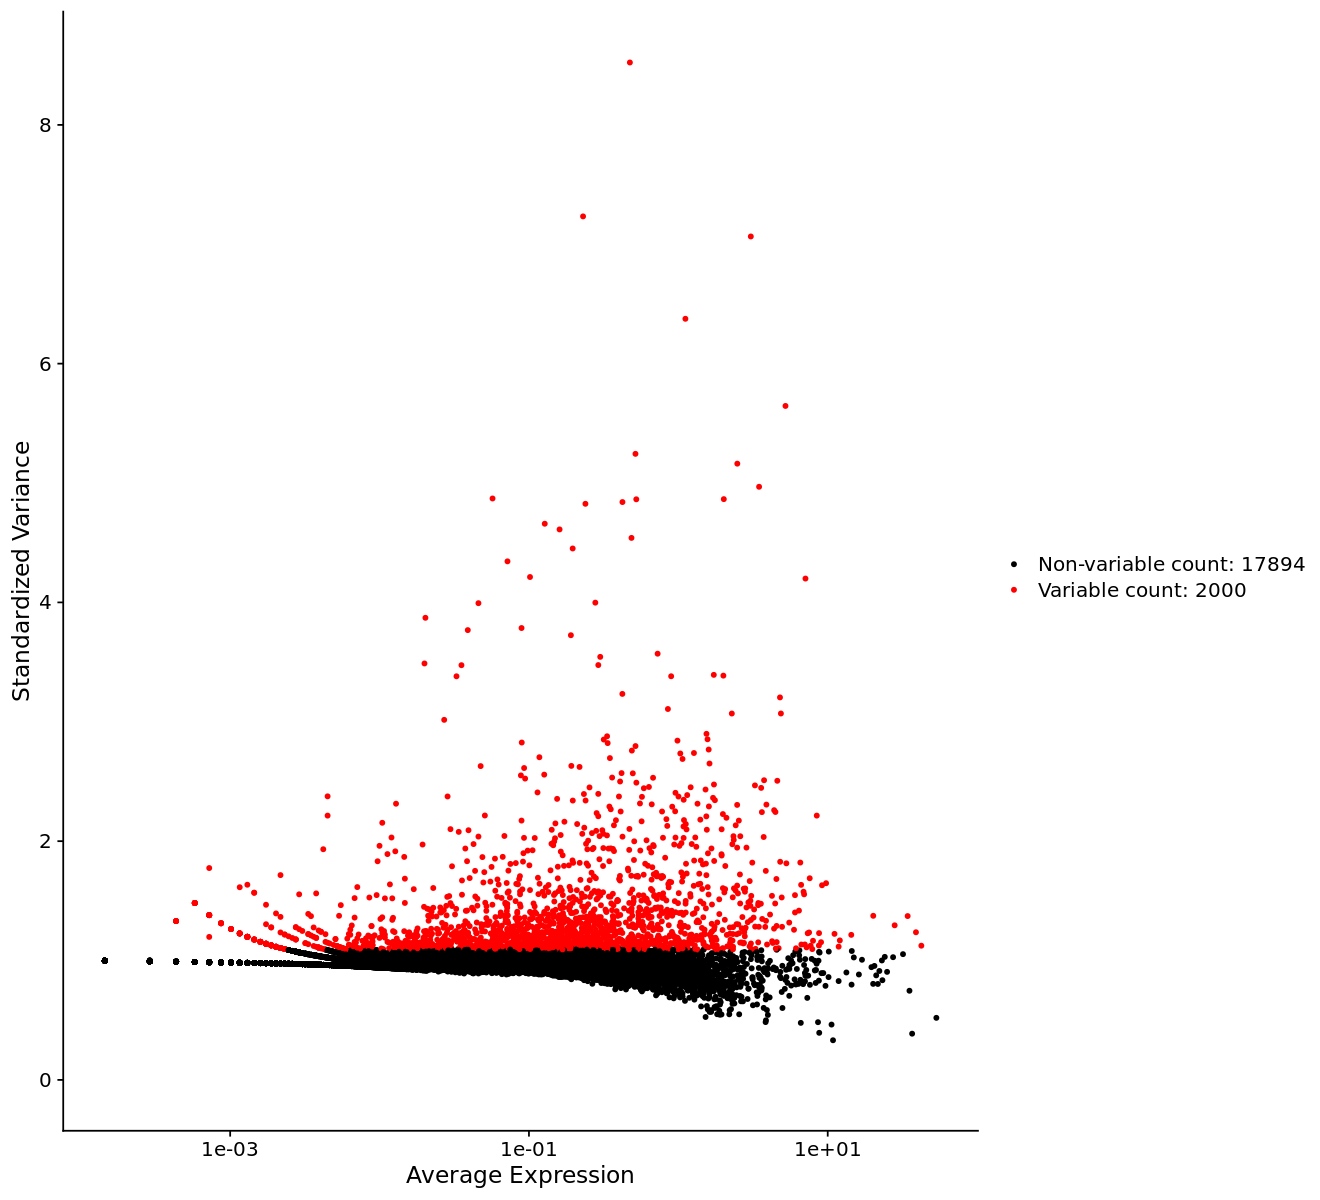

In [12]:
plot1 <- VariableFeaturePlot(df0)
plot1

In [13]:
plan(strategy = "multicore")
df0 <- ScaleData(object = df0, 
                 features = hvg, 
                 vars.to.regress = c('nFeature_RNA','batch','percent.mt','nCount_RNA'),
                 block.size = 20000,
                 verbose = F)
plan(strategy = "sequential")

Warning message:
“Requested variables to regress not in object: batch”


In [ ]:
GetAssayData(df0,slot = 'scale.data')

In [ ]:
df0 <- RunPCA(df0, npcs = 50, ndims.print = 1:5, nfeatures.print = 5)

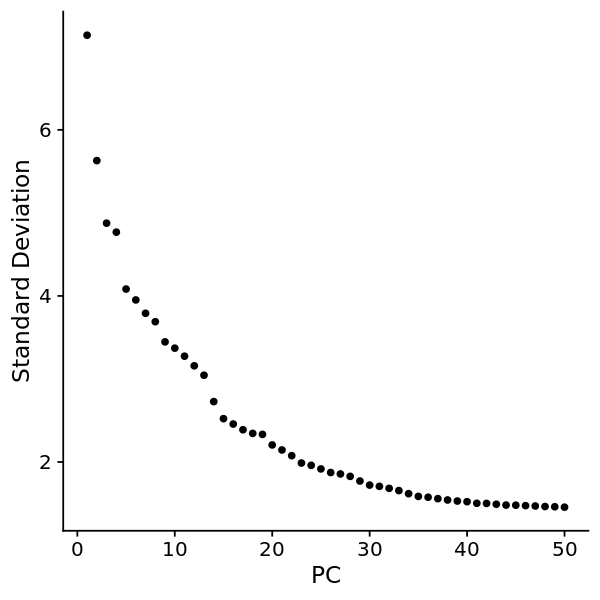

In [15]:
options(repr.plot.width=5, repr.plot.height=5)
ElbowPlot(df0, ndims = 50)

In [ ]:
plan(strategy = "multicore")
df0 <- RunUMAP(df0,
               n.neighbors = 15,
               min.dist = 0.4,
               metric = 'cosine',
               n.components = 2, 
               dims = 1:30, 
               # n.epochs = 100,
               verbose = F)
plan(strategy = "sequential")

In [ ]:
options(repr.plot.width=11, repr.plot.height=10)
DimPlot(object = df0, 
        reduction = "umap", 
        group.by = c('orig.ident'),
        label = T,
        pt.size = 0.5,
        label.size = 5) + 
        theme(legend.position = c(0.9, 0.9))

In [27]:
df0 <- FindNeighbors(object = df0, k.param = 20, reduction = 'umap', dims = 1:2, verbose = F)

In [32]:
df0 <- FindClusters(object = df0, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6905
Number of edges: 150698

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9797
Number of communities: 20
Elapsed time: 0 seconds


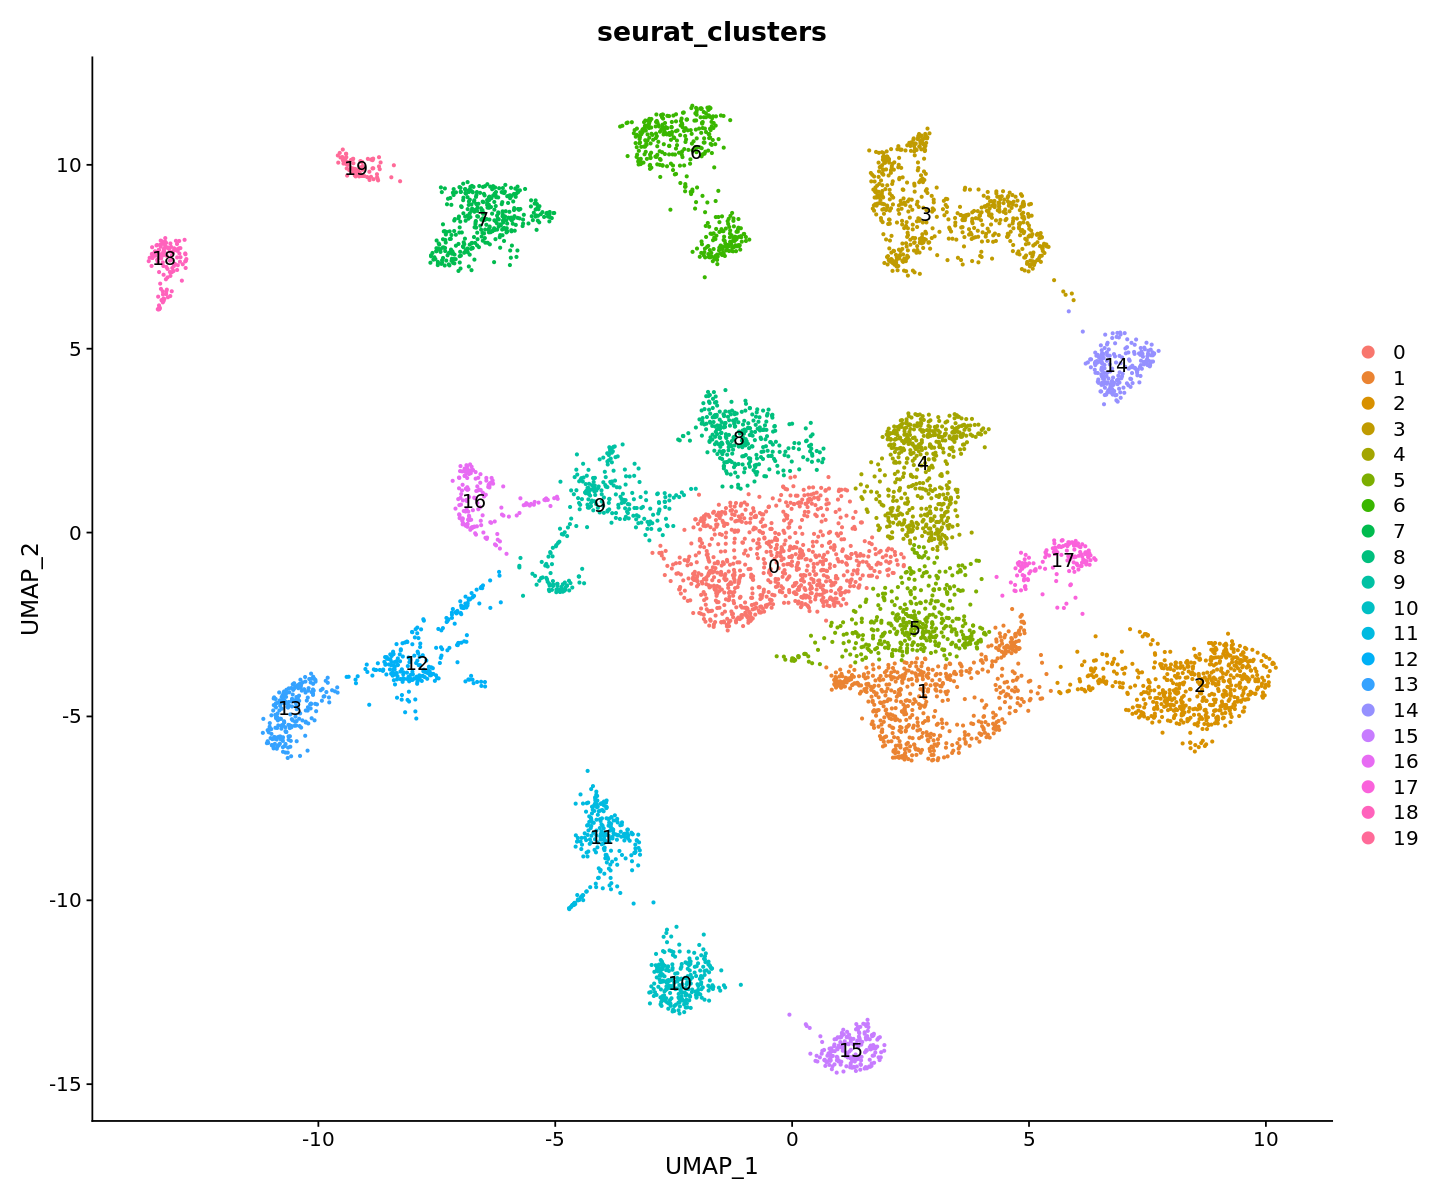

In [16]:
options(repr.plot.width=12, repr.plot.height=10)
DimPlot(df0,reduction = 'umap',pt.size = 0.5, group.by = 'seurat_clusters',label = T)

In [2]:
saveRDS(df0,'2020-08-01_TSC_clustered.rds')

ERROR: Error in saveRDS(df0, "2020-08-01_TSC_clustered.rds"): object 'df0' not found


In [2]:
df0 <- readRDS('2020-08-01_TSC_clustered.rds')

In [20]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 0.00001,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q10',
                    max.cutoff = 'q95',
                    order = T,
                    features = c('RBFOX3','CUX1','CUX2','SATB2','RORB','FEZF2','BCL11B',
                                 'FOXP2', 'ROBO2','NRXN3','GAD1',
                                 'GAD2', 'DLX6','MKI67','NEUROD2','RELN',
                                 'FAM19A1','GFAP', 'PTPRC','SLC1A2',
                                 'SLC1A3', 'MMD2','OLIG1','OLIG2','MOBP','PLP1','CX3CR1','TLE4',
                                 'YWHAH','EGFR','FGFR1','SST','PVALB','VIP','MKI67','COL4A1','TMEM119'))

In [21]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 10,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for pa

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing 

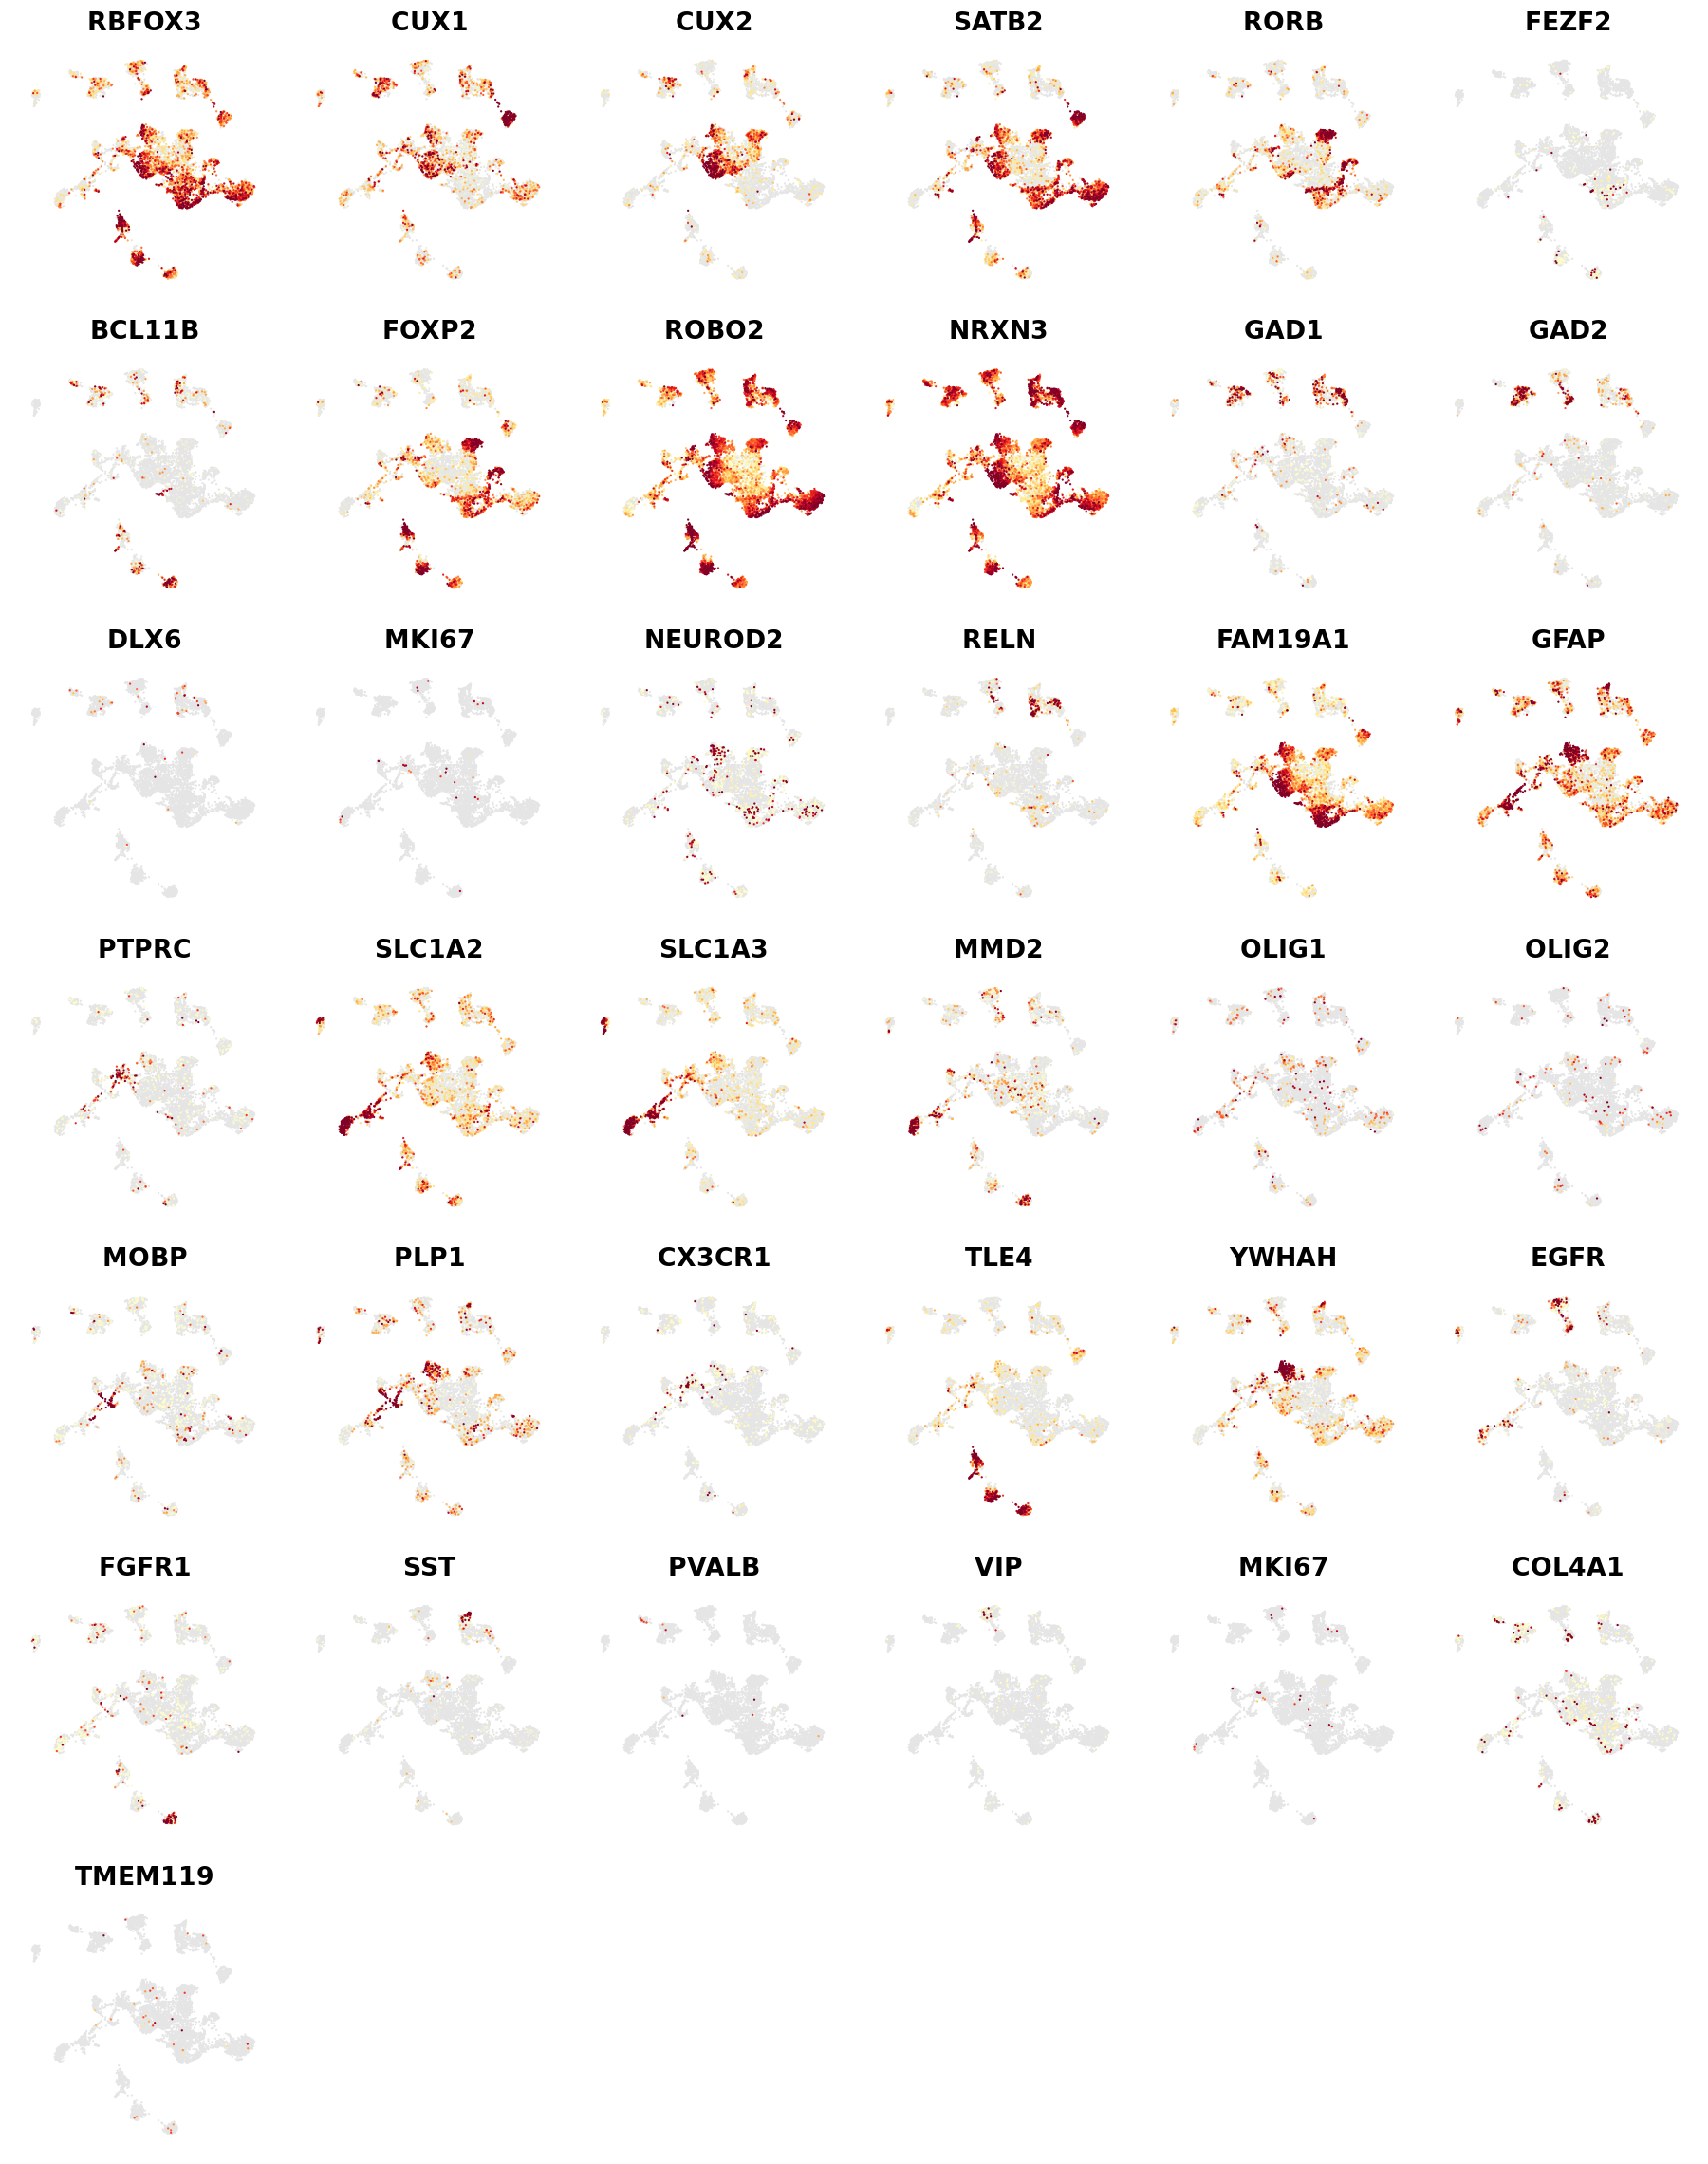

In [22]:
options(repr.plot.width=15, repr.plot.height=19)
do.call(gridExtra::grid.arrange, plist)

In [38]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 0.3,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q10',
                    max.cutoff = 'q95',
                    order = T,
                    features = c('YWHAH','PEBP1','YWHAG','CFL1','SELENOW','ACTG1','ACTB','PRNP','HPCAL1'))

In [39]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 6,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will rep

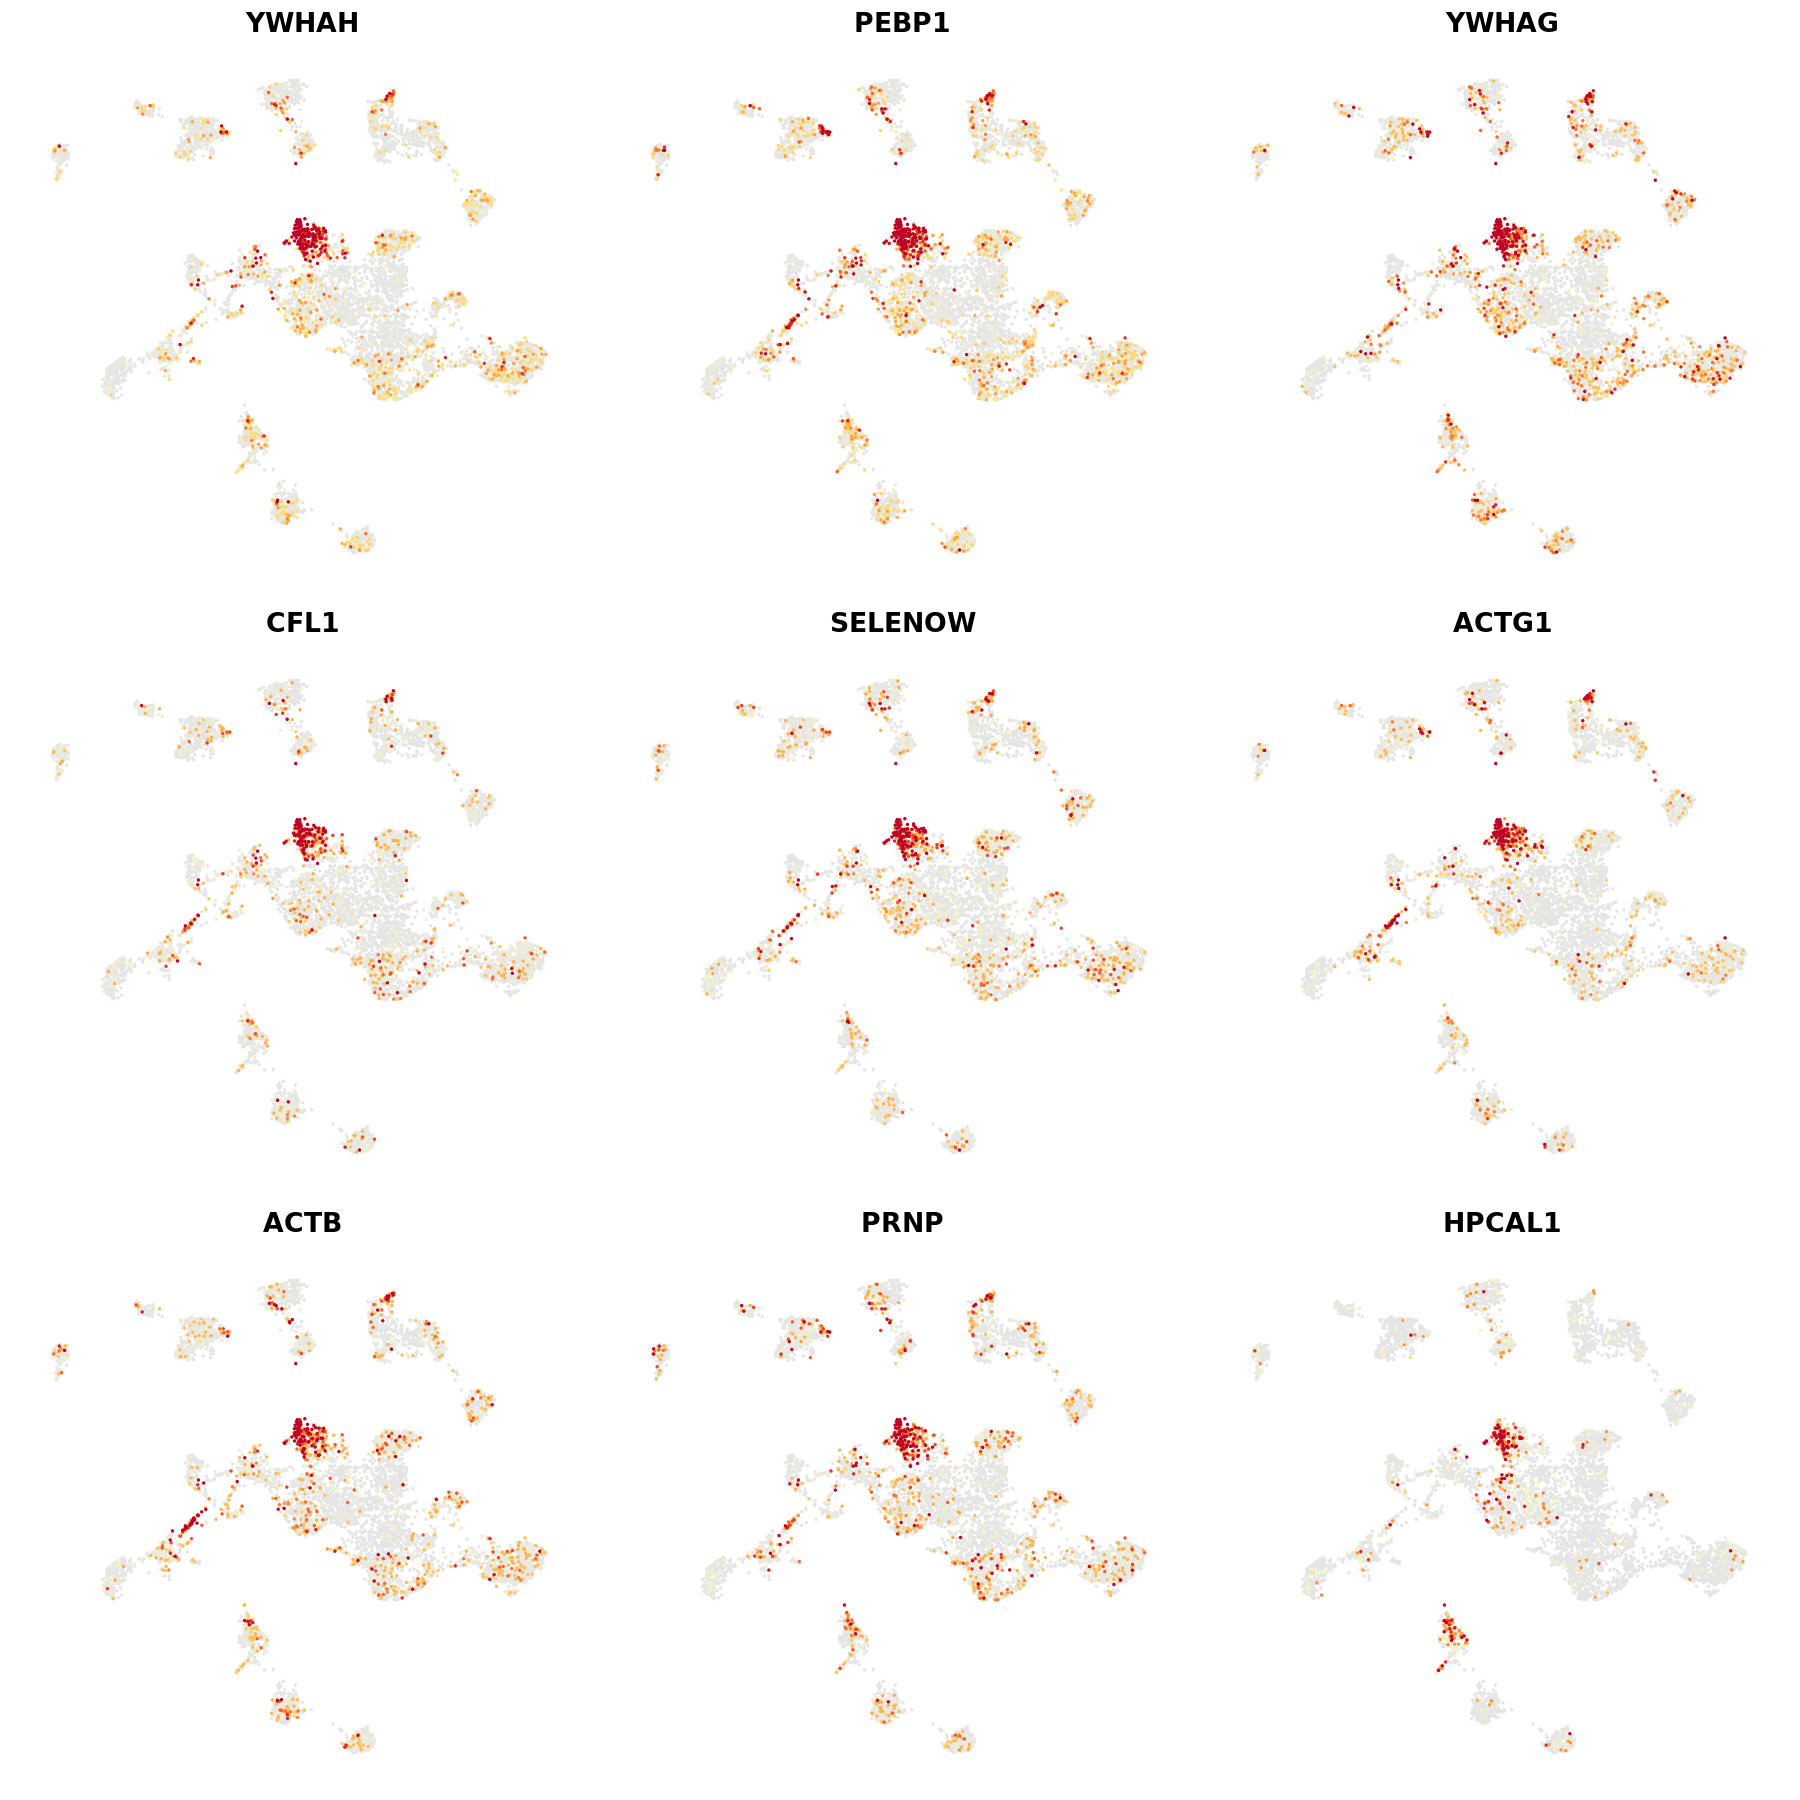

In [40]:
options(repr.plot.width=15, repr.plot.height=15)
do.call(gridExtra::grid.arrange, plist)

In [41]:
pdf(file = paste(Sys.Date(), "TSC_cluster8_DEX_heatmap.pdf", sep = "_"),
    width = 15, height = 19, useDingbats = F);
do.call(gridExtra::grid.arrange, plist)
dev.off()

png 
  2

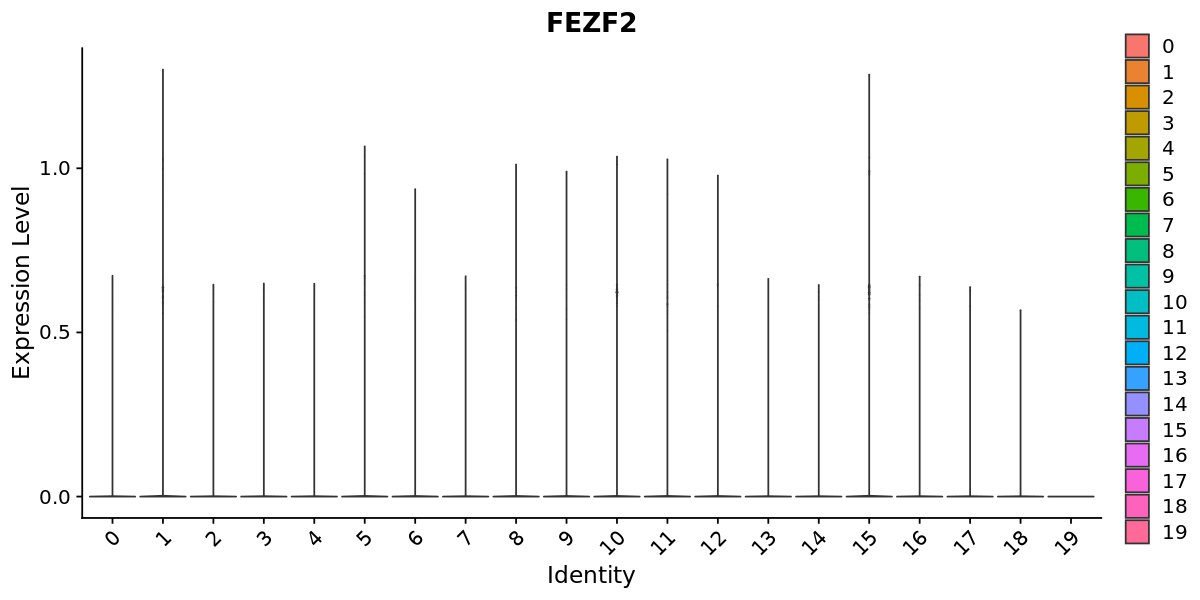

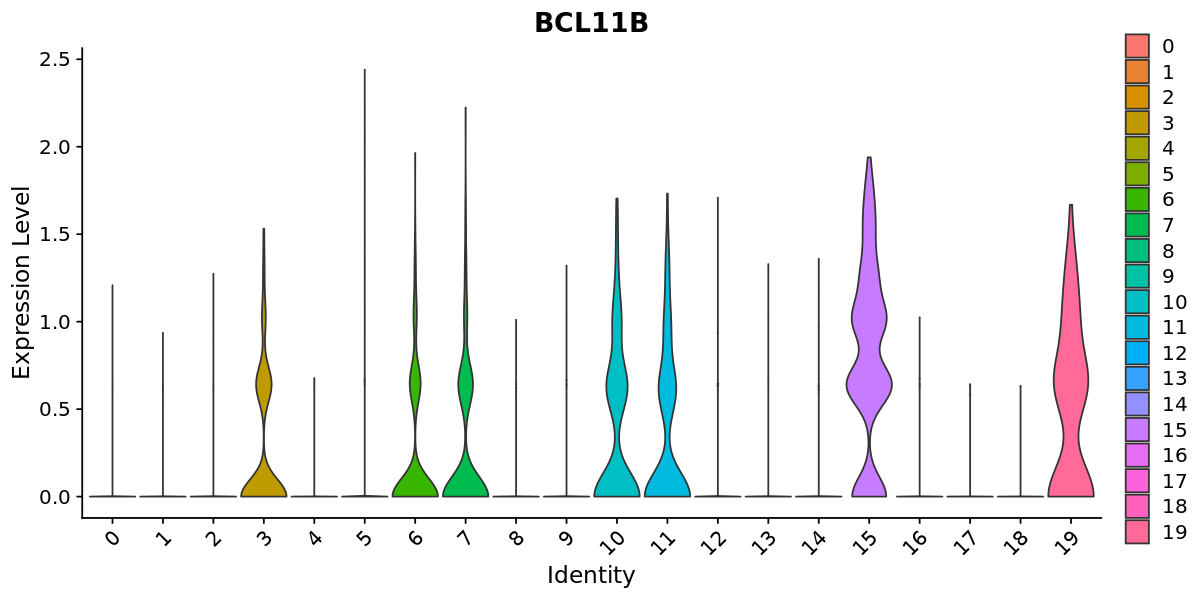

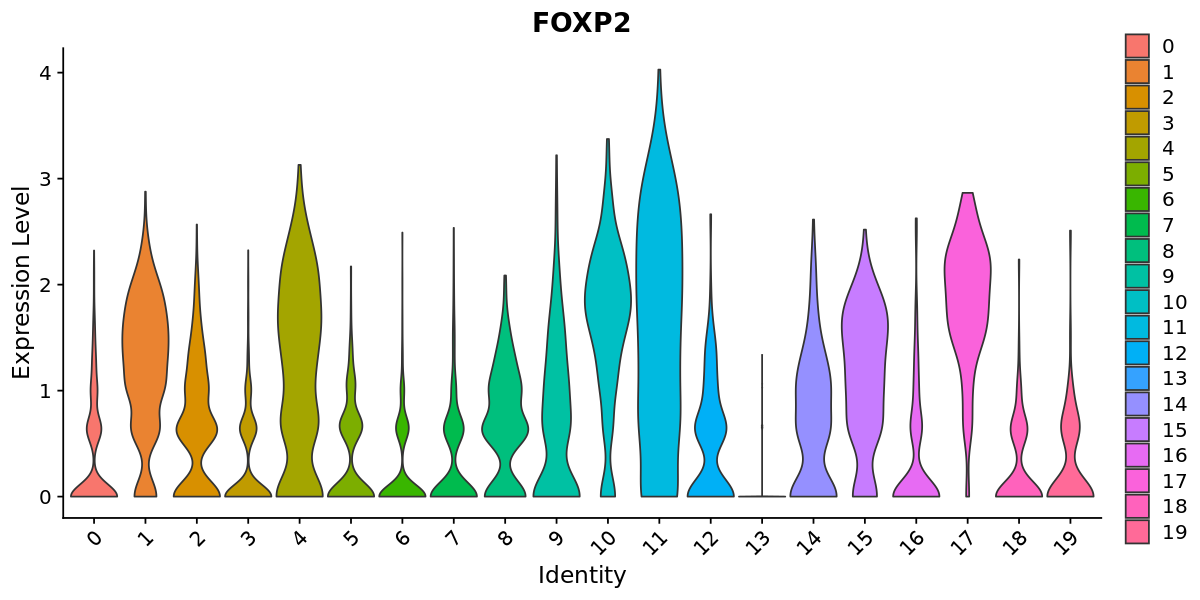

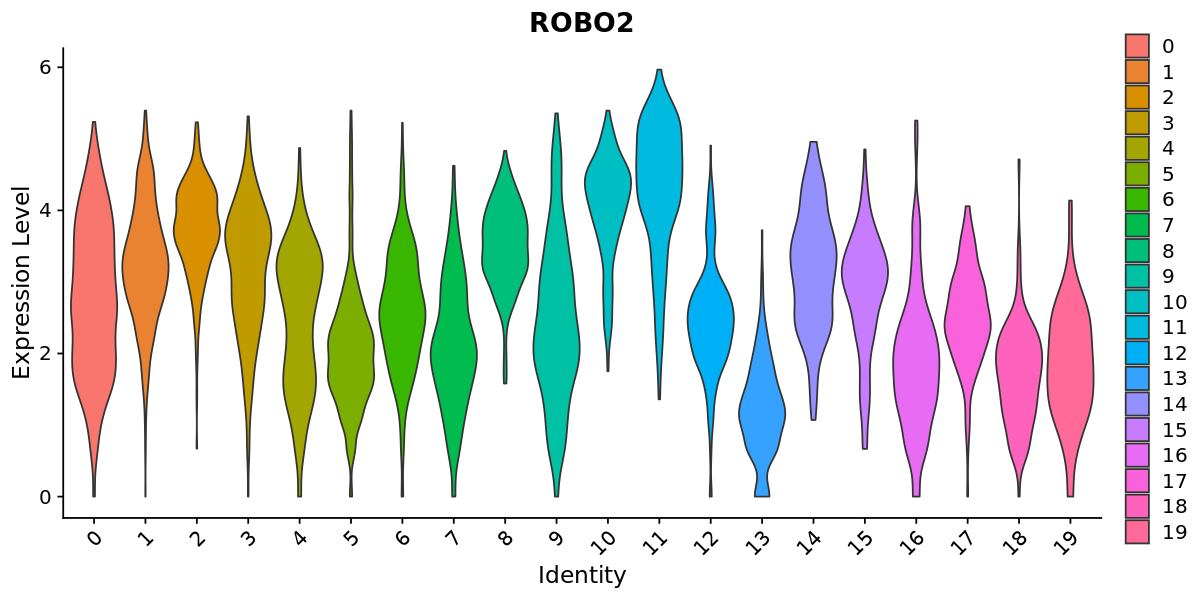

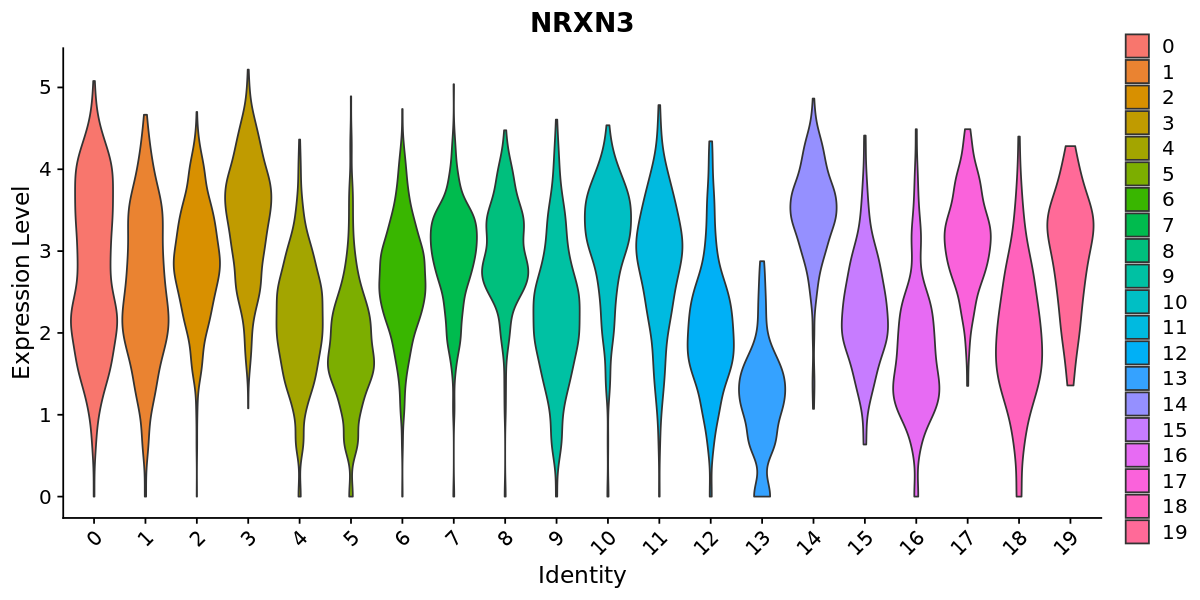

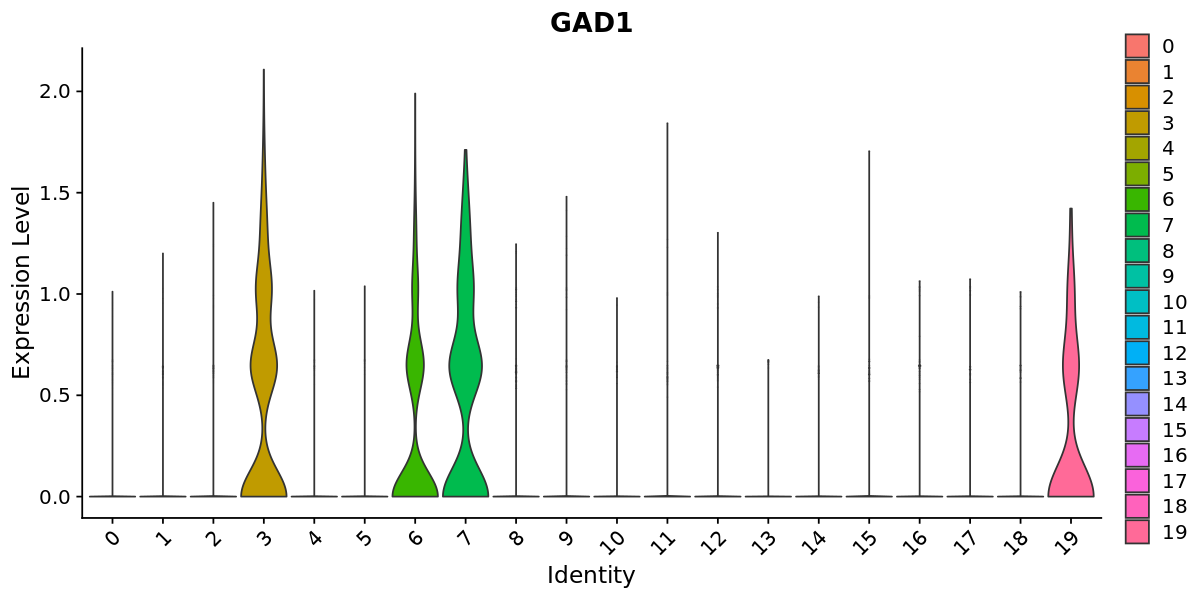

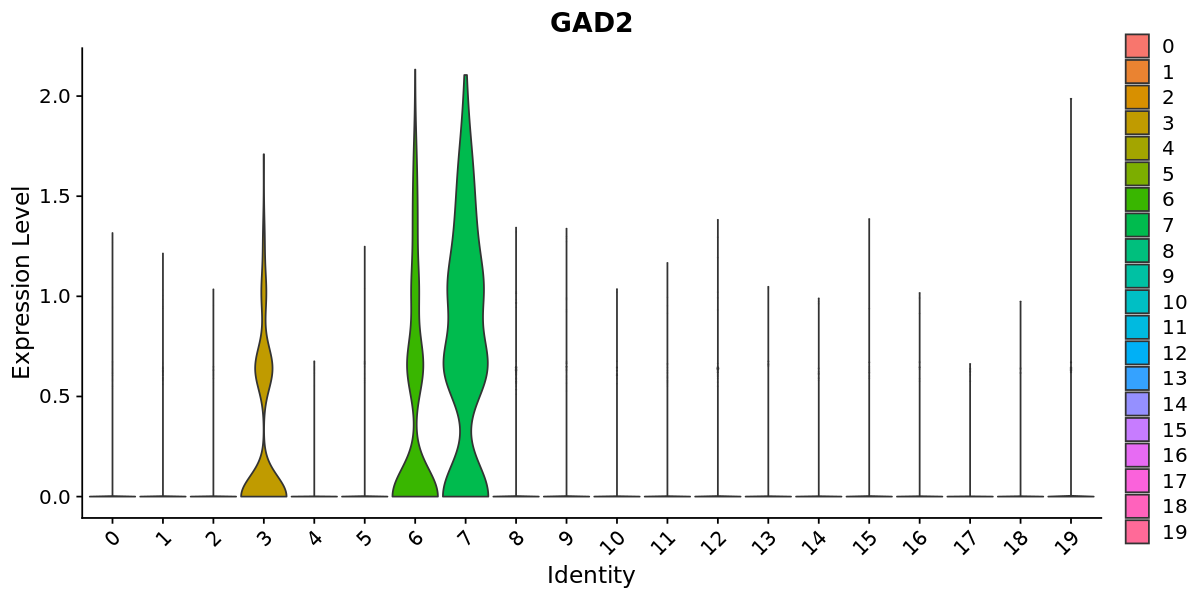

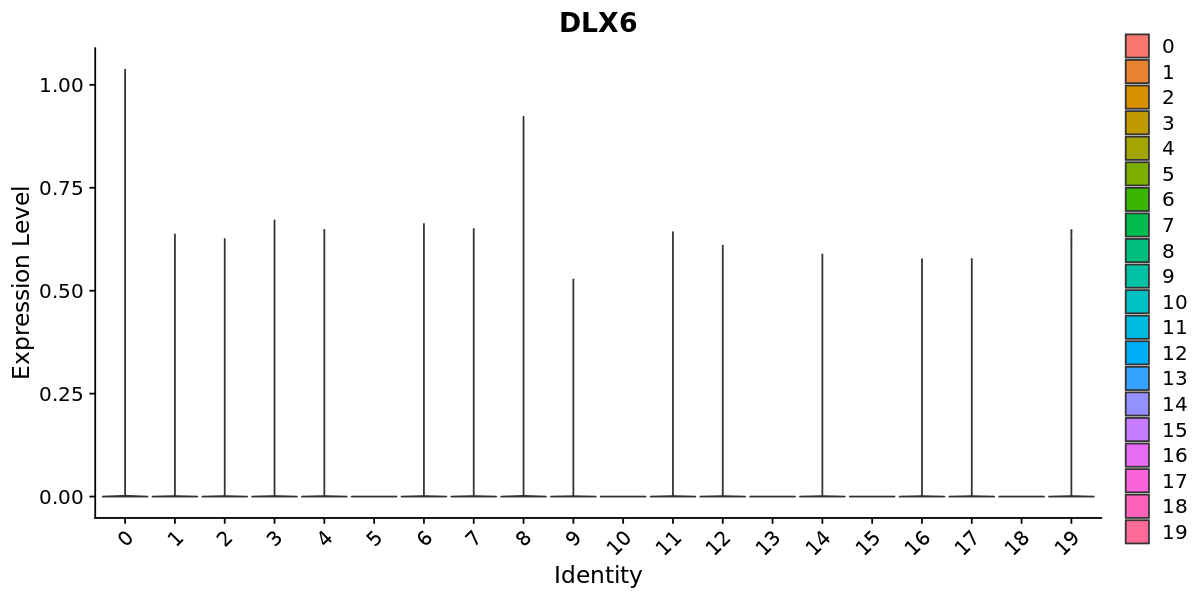

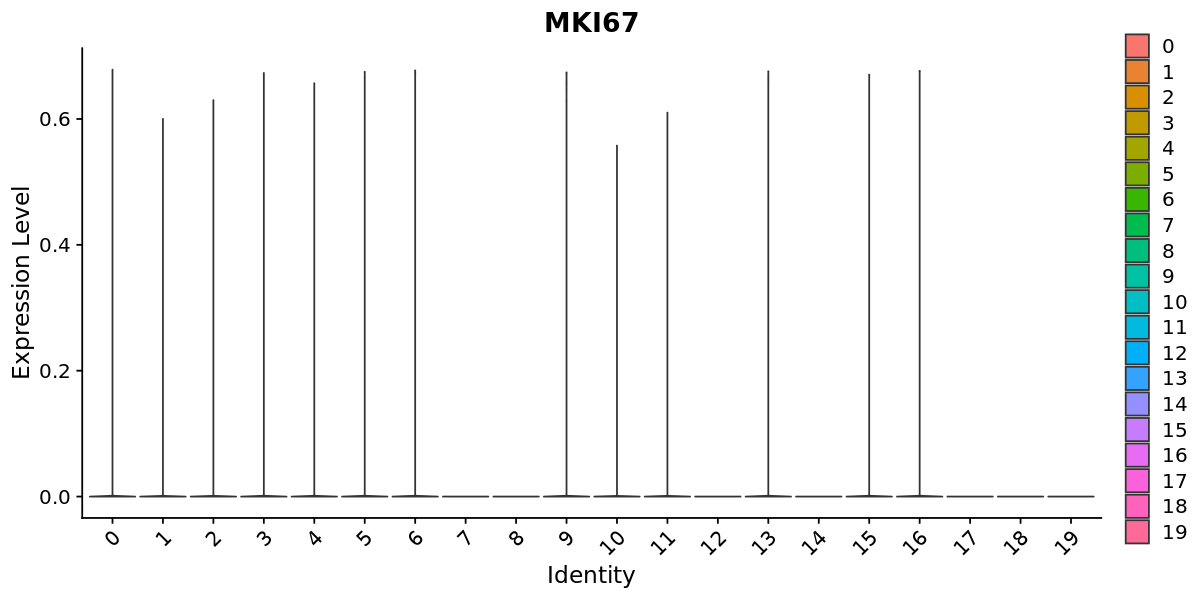

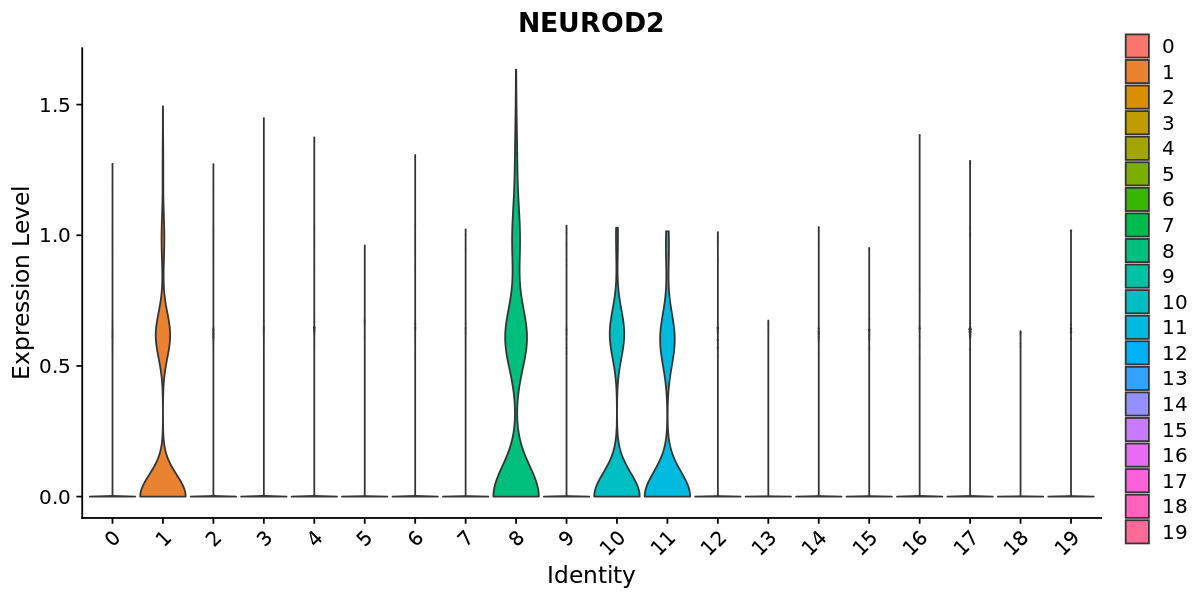

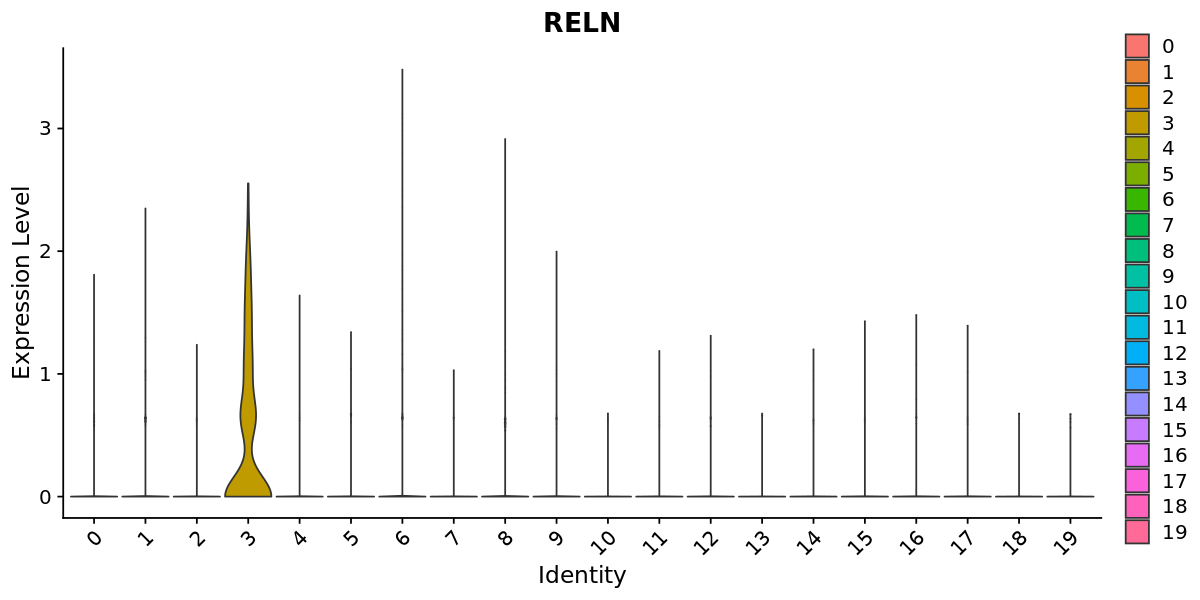

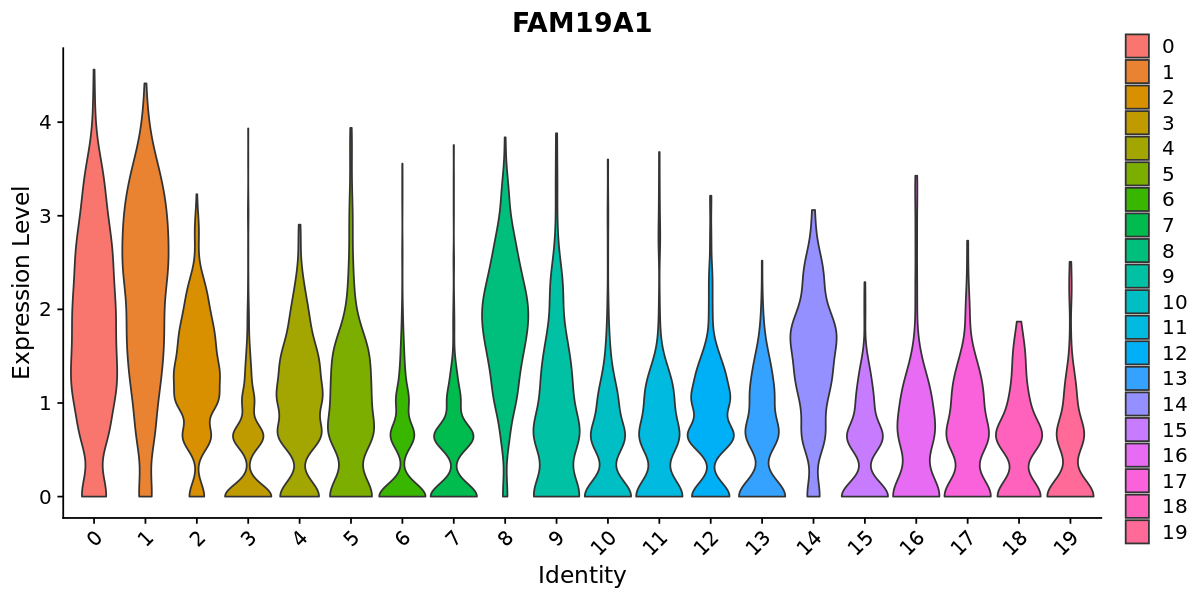

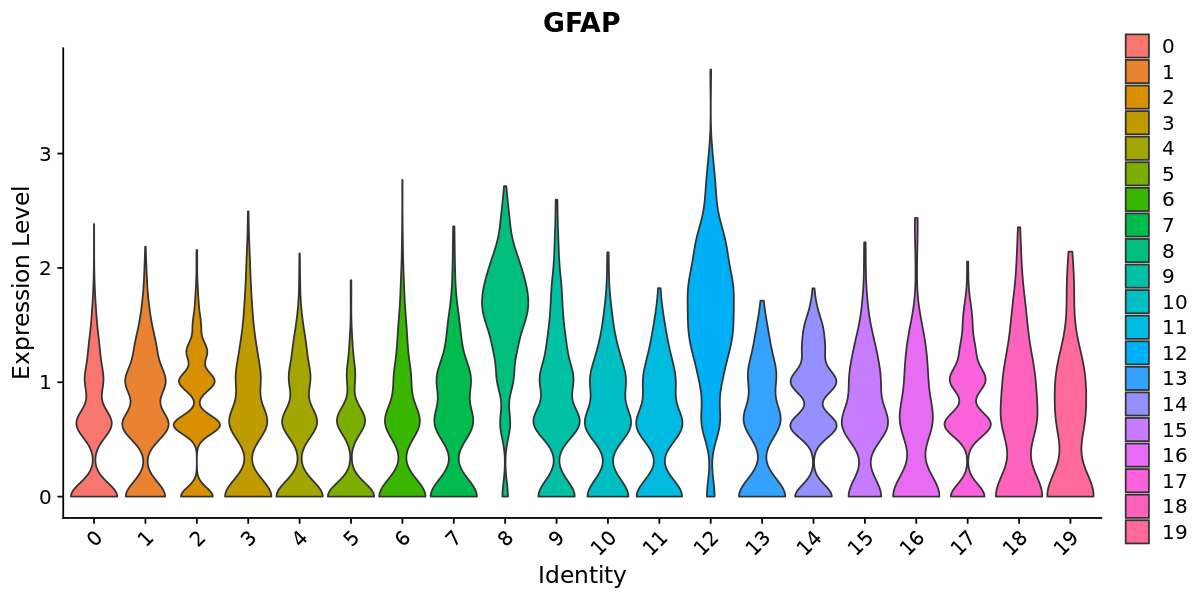

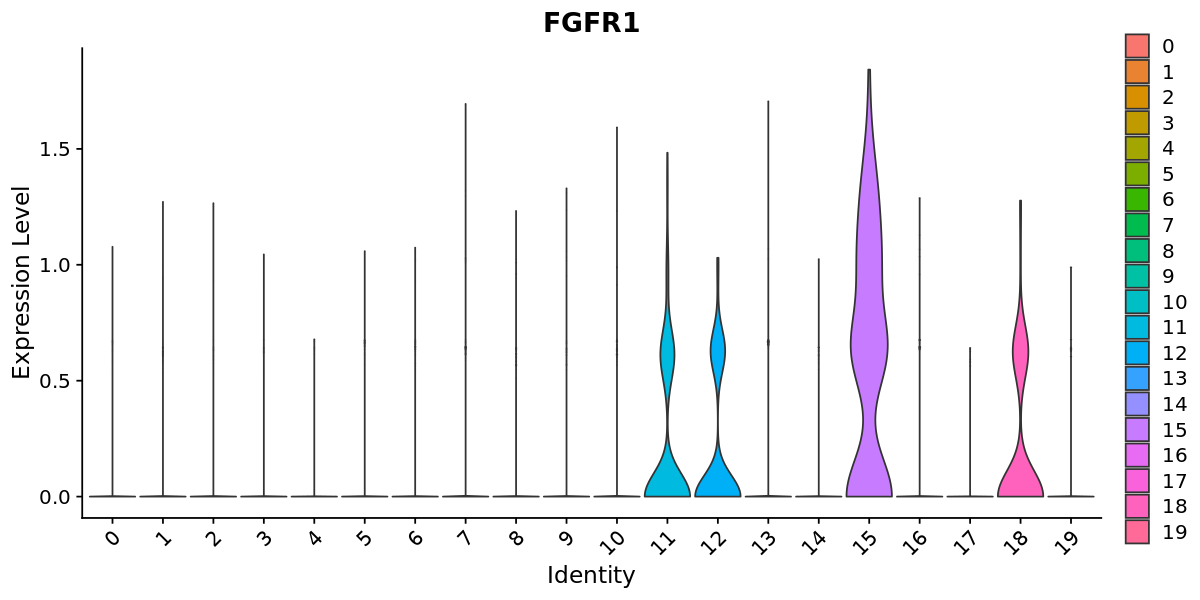

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]


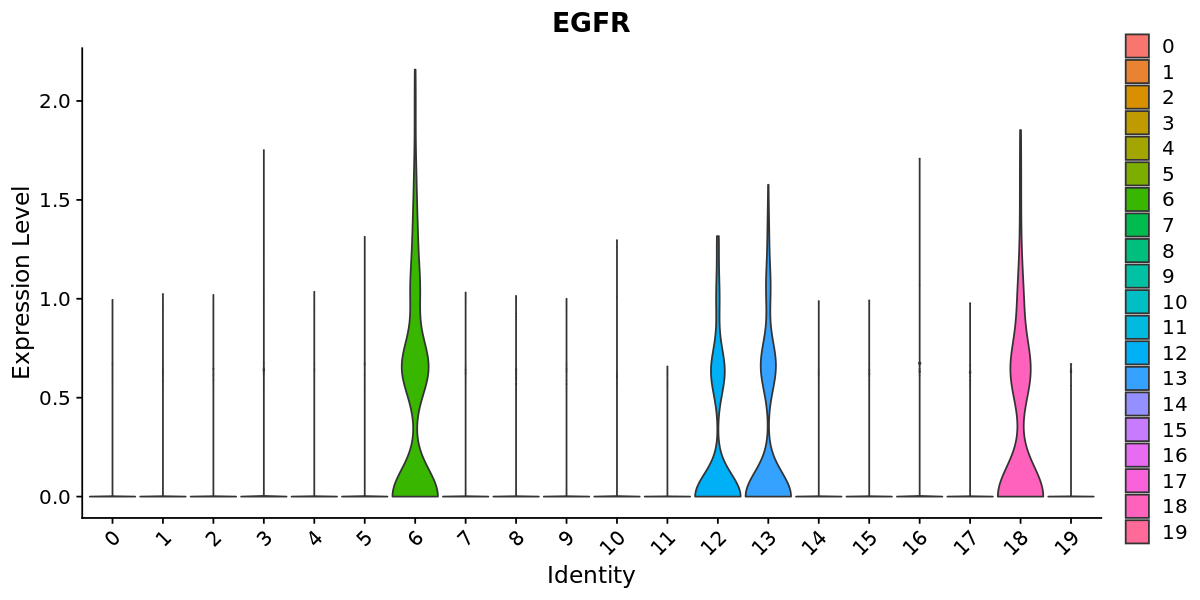

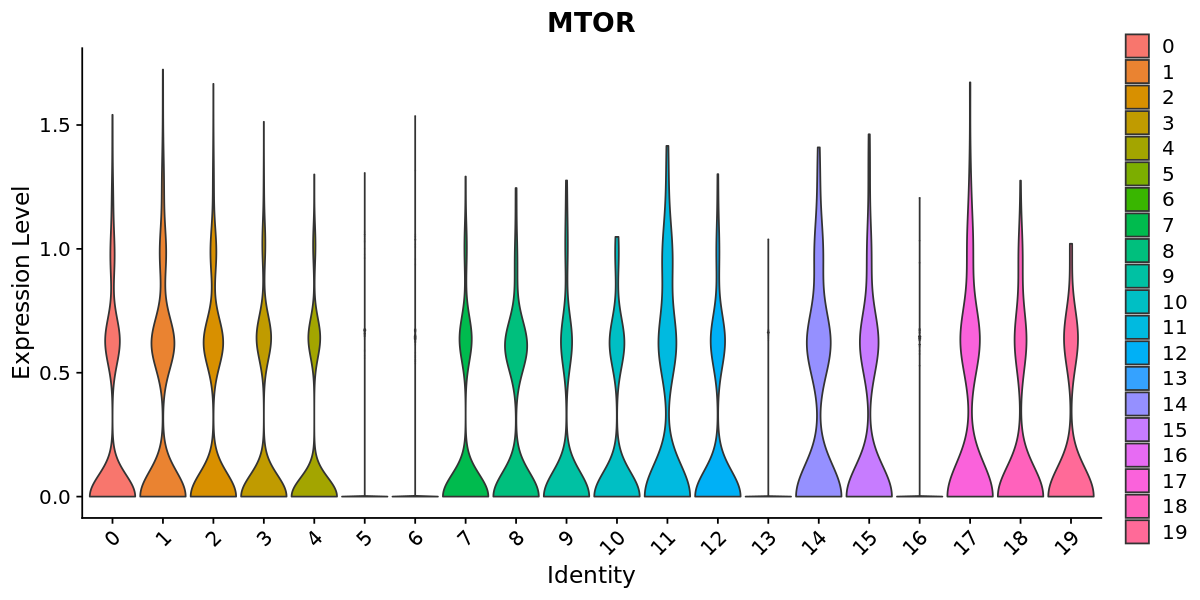

In [42]:
options(repr.plot.width=10, repr.plot.height=5)
plots <- VlnPlot(df0, features = c('FEZF2','BCL11B',
                                 'FOXP2', 'ROBO2','NRXN3','GAD1',
                                 'GAD2', 'DLX6','MKI67','NEUROD2','RELN',
                                 'FAM19A1','GFAP','FGFR1','EGFR','MTOR'), group.by = "seurat_clusters", 
    pt.size = 0, combine = FALSE)
plots

In [44]:
plan(strategy = "multicore")
DEX <- FindAllMarkers(object = df0,
                    # min.diff.pct = 0.3,
                      slot = 'scale.data',
                      features = hvg,
                      return.thresh = 0.01,
                      min.pct = 0.1, 
                      logfc.threshold = 0.25,
                      only.pos = TRUE,
                     verbose = FALSE)

# pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

plan(strategy = "sequential")

In [45]:
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)

In [46]:
DEX <- DEX[!(duplicated(DEX$gene)),]

In [47]:
write.csv(DEX, "2020-08-01_TSC_RNA.csv")

In [48]:
top10 <- DEX %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = diff.pct)

In [49]:
pdf(file = paste(Sys.Date(), "TSC_DEX_heatmap.pdf", sep = "_"),
    width = 5, height = 4, useDingbats = F);
DoHeatmap(df0,
          disp.min = -1,
          disp.max = 1,
#           slot = 'data', 
          features = top10$gene,
          size = 2) + 
          scale_fill_gradientn(colors = c("#1b75bb", "black","#faaf40"))+
          theme(text = element_text(size = 3)) +
          NoLegend()
dev.off()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

# DoubletFinder

Loading required package: fields

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: maps

See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 



[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing across cells



[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing across cells



[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing across cells



[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing across cells



[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing across cells



[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing across cells



[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR



NULL


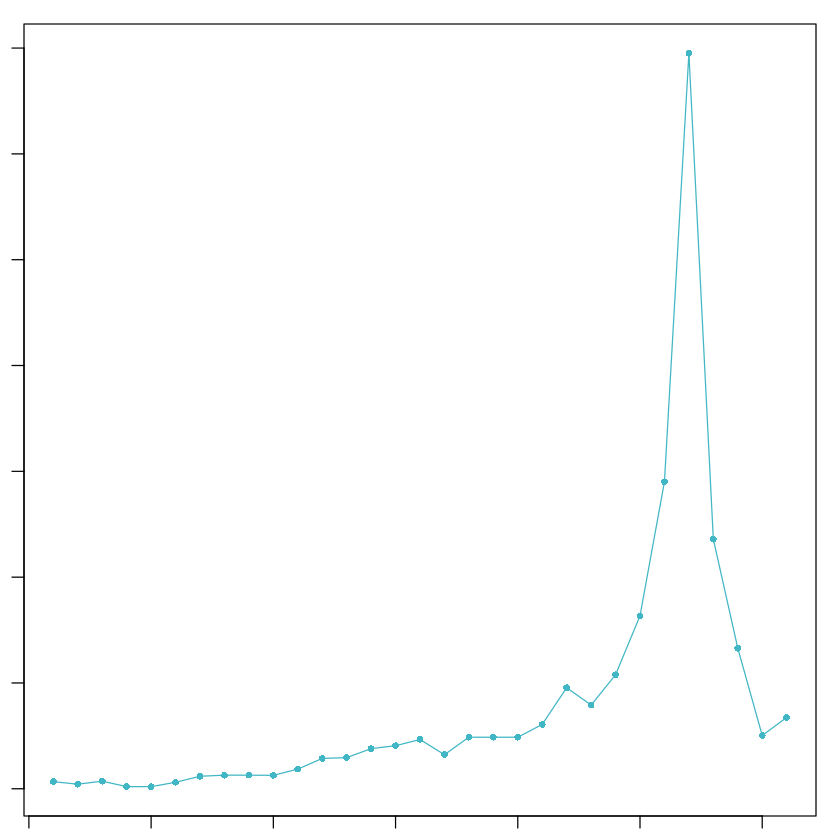

In [3]:
sweep.res.list_df0 <- paramSweep_v3(df0, PCs = 1:10, sct = FALSE)
sweep.stats_df0 <- summarizeSweep(sweep.res.list_df0, GT = FALSE)
bcmvn_df0 <- find.pK(sweep.stats_df0)

In [8]:
bcmvn_df0

ParamID pK    MeanBC    VarBC        BCmetric  
1   1      0.005 0.7976568 2.369736e-03   336.6015
2   2      0.01  0.7840336 3.606626e-03   217.3870
3   3      0.02  0.7633810 2.123789e-03   359.4430
4   4      0.03  0.6919161 6.730925e-03   102.7966
5   5      0.04  0.6526617 6.502775e-03   100.3666
6   6      0.05  0.6176094 2.004484e-03   308.1138
7   7      0.06  0.6063287 1.023386e-03   592.4733
8   8      0.07  0.6130136 9.539159e-04   642.6285
9   9      0.08  0.6284228 9.764465e-04   643.5814
10 10      0.09  0.6441340 1.012043e-03   636.4688
11 11      0.1   0.6612147 7.104569e-04   930.6893
12 12      0.11  0.6761480 4.707237e-04  1436.4011
13 13      0.12  0.6837593 4.642175e-04  1472.9288
14 14      0.13  0.6914315 3.640647e-04  1899.1994
15 15      0.14  0.6967352 3.421890e-04  2036.1123
16 16      0.15  0.7022392 3.013745e-04  2330.1216
17 17      0.16  0.7078264 4.392602e-04  1611.4059
18 18      0.17  0.7149984 2.932710e-04  2438.0126
19 19      0.18  0.7193153 2.953137e-04  2435.7671
20 20      0.19  0.7221699 2.963823e-04  2436.6164
21 21      0.2   0.7226440 2.376485e-04  3040.8102
22 22      0.21  0.7206465 1.508616e-04  4776.8714
23 23      0.22  0.7174229 1.813645e-04  3955.6974
24 24      0.23  0.7104873 1.318550e-04  5388.3984
25 25      0.24  0.7027131 8.599937e-05  8171.1428
26 26      0.25  0.6958362 4.796320e-05 14507.7084
27 27      0.26  0.6900746 1.985775e-05 34750.8932
28 28      0.27  0.6876713 5.831503e-05 11792.3514
29 29      0.28  0.6886985 1.036518e-04  6644.3473
30 30      0.29  0.6889079 2.735368e-04  2518.5197
31 31      0.3   0.6900413 2.047108e-04  3370.8111

In [4]:
annotations <- df0@meta.data$seurat_clusters

In [5]:
homotypic.prop <- modelHomotypic(annotations)           ## ex: annotations <- seu_kidney@meta.data$ClusteringResults
nExp_poi <- round(0.075*7428)  ## Assuming 7.5% doublet formation rate - tailor for your dataset
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

In [6]:
nExp_poi

[1] 557

In [7]:
nExp_poi.adj

[1] 523

In [9]:
df0 <- doubletFinder_v3(df0, PCs = 1:10, pN = 0.25, pK = 0.26, nExp = nExp_poi, reuse.pANN = FALSE, sct = FALSE)
#df0 <- doubletFinder_v3(df0, PCs = 1:10, pN = 0.25, pK = 0.09, nExp = nExp_poi.adj, reuse.pANN = "pANN_0.25_0.09_557", sct = FALSE)

[1] "Creating 2476 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing across cells



[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [11]:
df0@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mt
58_ACTGTCCTCCAAGCTA 58         38898      7441         3.0758421 
58_TAATTCCAGGTTAGTA 58         38055      6973         0.5069679 
58_GACAGCCTCAAAGAAC 58         36214      6761         0.3671695 
58_AGCATCATCCTCTTTC 58         33034      6315         0.4292432 
58_TCAATTCCACACAGCC 58         32872      6403         1.4704674 
58_CTCAGTCCAACTCCAA 58         32032      6152         0.3835494 
58_ATTTACCTCTCAACGA 58         31549      6161         0.5985267 
58_ATCTCTATCCACTGGG 58         30541      6348         0.4435567 
58_GGAGAACAGAAACACT 58         29081      5840         0.5044372 
58_AGAGAGCAGATTGACA 58         25408      6508         4.4872016 
58_CACAGGCCACTCCTGT 58         25090      5803         4.2202850 
58_CACAACATCCTCTAGC 58         25876      5844         1.1144954 
58_ATCACTTGTTAAACCC 58         26228      5601         0.4325833 
58_TTAATCCTCACCTTAT 58         25008      6318         1.6284551 
58_TAACACGTCTGCATAG 58         24924      6142         0.8299646 
58_TCTTCCTTCTACGCGG 58         24889      5555         0.2653947 
58_GTCCACTTCCCTCAAC 58         24281      5700         0.7248789 
58_ATCACAGGTTCCATTT 58         24197      5493         0.6337136 
58_GACTCTCCAAGTAGTA 58         24376      5545         0.4587156 
58_CTTAGGACACTCCTGT 58         23774      5419         0.6230530 
58_CCCTAACGTTACCCAA 58         23570      5430         0.2818403 
58_CATTGCCGTCAAGGCA 58         23608      5486         0.7747205 
58_CCTCACACACACCGCA 58         23256      5499         0.3975299 
58_ACCTACCTCTATTGTC 58         23117      5418         0.4041346 
58_AGAACCTTCTCCACTG 58         22809      5641         0.6450598 
58_TGAGTCACACCAGCTG 58         21866      6099         4.4080405 
58_CTTACCGCACGACGAA 58         22418      5270         0.5253238 
58_CTCCCTCCACCCAATA 58         22410      5290         0.5901955 
58_GATTCTTTCAACCTTT 58         22325      5213         0.3699682 
58_TTTCCTCTCTCCGCAT 58         22411      5239         0.4944476 
⋮                   ⋮          ⋮          ⋮            ⋮         
59_CCTCTCCCACTACCCT 59         1027       701          8.907823  
59_GTCCTCACACATTCGA 59         1041       741          7.286822  
59_TCTTTGAAGTTGTAGA 59         1007       755          9.612403  
59_TGCGGGTCAGACTGCC 59          977       764          9.302326  
59_GCCATGGTCTGGGTCG 59         1047       802          7.990690  
59_GTCCCATTCTCCGAAA 59         1000       736          8.462733  
59_TTGCATTCATGTTCGA 59         1000       718          8.928571  
59_GTCACTCCAAATAAGC 59         1042       711          7.536908  
59_TTGGGTAGTGAGAACC 59         1011       760          8.398134  
59_AGTTCCCGTCTAGTGT 59         1049       757          7.081712  
59_CGGAGAATCATGGCCG 59         1015       764          9.961089  
59_TGTGATGCAGTAGAAT 59         1014       755          8.560311  
59_ATTACCTTCGAGCACC 59          949       694          9.034268  
59_CGGGTCAAGCGACCCT 59          921       674          7.554517  
59_GATTCGACAGACGGAT 59         1027       725          8.255452  
59_CATTTCACATCAACCA 59          966       724          8.963367  
59_GATTGGTCATGTTTGG 59         1008       755          9.976617  
59_GGGTAGAAGGCACAAC 59          996       738          9.906396  
59_TTGTGGAGTTGGGCCT 59         1045       761          9.140625  
59_GTAACCATCAGCAGAG 59          990       738          7.836991  
59_TCATTGTGTGGAAGTC 59         1005       713          8.150470  
59_ACTTTGTCACTGTCCT 59          988       735          8.941176  
59_CTGTGAATCGCTACGG 59         1086       729          5.267296  
59_CACGTTCAGACTTCCA 59          981       728          9.677419  
59_TTGAGTGCAAGGGTCA 59         1028       759          9.047994  
59_ACTTTGTGTACGCGTC 59          988       740          7.819905  
59_CAATACGCACGATTCA 59         1030       753          7.740916  
59_GACGTTATCGTTTACT 59          967       730          9.241706  
59_GAGCCTGTCTTGGCTC 59          979       692          9.794

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


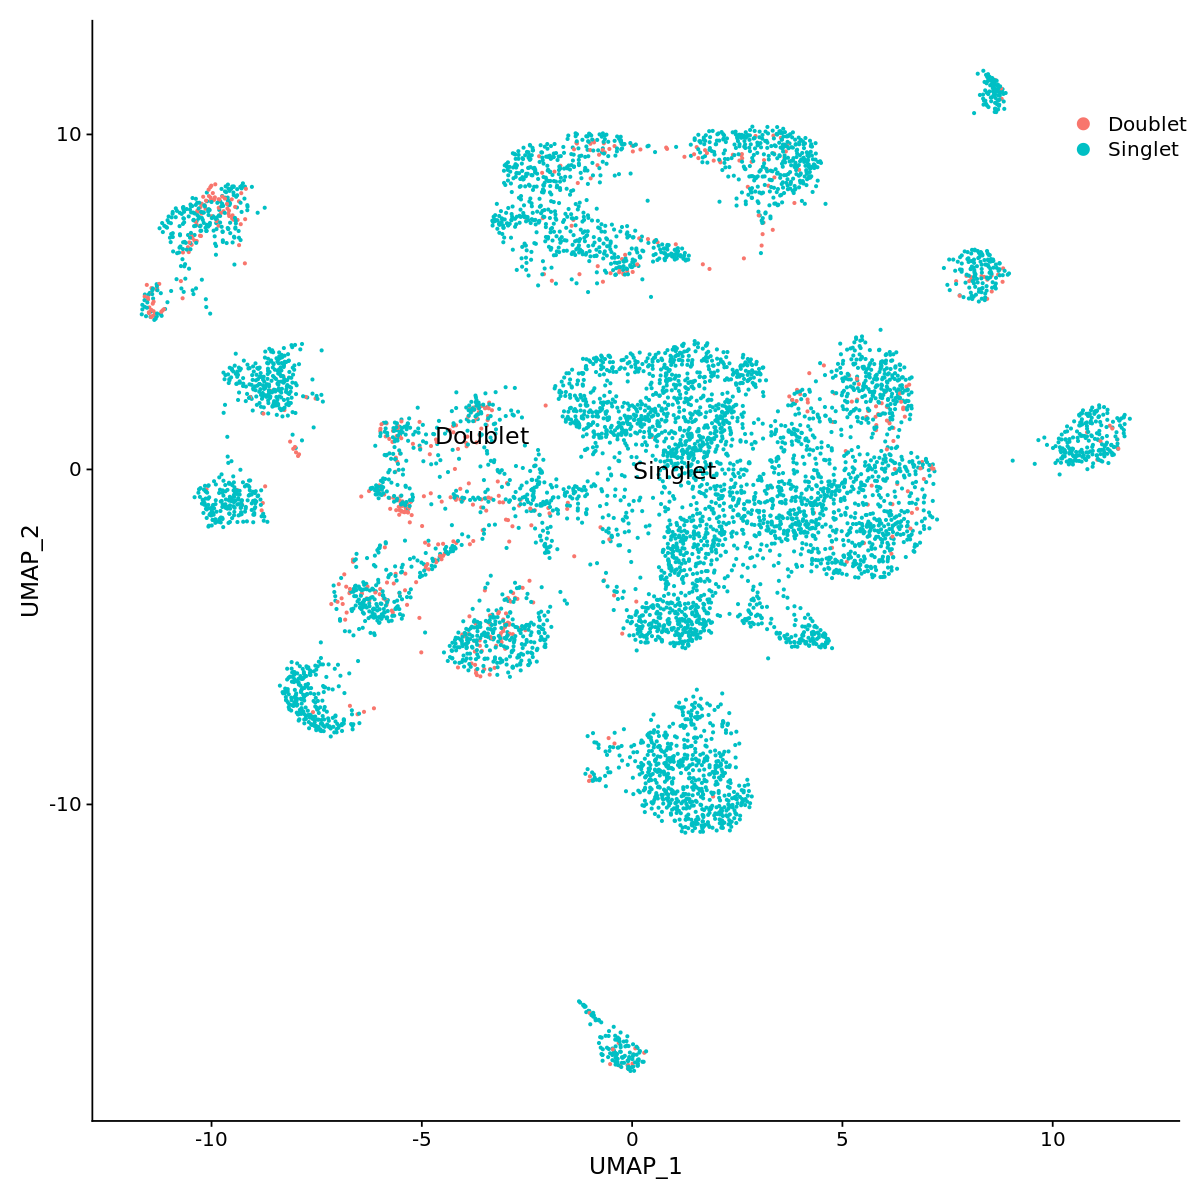

In [12]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(object = df0, 
        reduction = "umap", 
        group.by = c('DF.classifications_0.25_0.26_557'),
        label = T,
        pt.size = 0.5,
        label.size = 5) + 
        theme(legend.position = c(0.9, 0.9))

In [13]:
df0 <- doubletFinder_v3(df0, PCs = 1:10, pN = 0.25, pK = 0.26, nExp = nExp_poi.adj, reuse.pANN = FALSE , sct = FALSE)

[1] "Creating 2476 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing across cells



[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [16]:
head(df0@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt
58_ACTGTCCTCCAAGCTA 58         38898      7441         3.0758421 
58_TAATTCCAGGTTAGTA 58         38055      6973         0.5069679 
58_GACAGCCTCAAAGAAC 58         36214      6761         0.3671695 
58_AGCATCATCCTCTTTC 58         33034      6315         0.4292432 
58_TCAATTCCACACAGCC 58         32872      6403         1.4704674 
58_CTCAGTCCAACTCCAA 58         32032      6152         0.3835494 
                    RNA_snn_res.0.3 seurat_clusters RNA_snn_res.0.9
58_ACTGTCCTCCAAGCTA 5               15              15             
58_TAATTCCAGGTTAGTA 5               13              13             
58_GACAGCCTCAAAGAAC 6               13              13             
58_AGCATCATCCTCTTTC 8               12              12             
58_TCAATTCCACACAGCC 5               7               7              
58_CTCAGTCCAACTCCAA 7               5               5              
                    pANN_0.25_0.26_557 DF.classifications_0.25_0.26_557
58_ACTGTCCTCCAAGCTA 0.3254369          Singlet                         
58_TAATTCCAGGTTAGTA 0.3122330          Singlet                         
58_GACAGCCTCAAAGAAC 0.3141748          Singlet                         
58_AGCATCATCCTCTTTC 0.3258252          Singlet                         
58_TCAATTCCACACAGCC 0.3184466          Singlet                         
58_CTCAGTCCAACTCCAA 0.3168932          Singlet                         
                    pANN_0.25_0.26_523 DF.classifications_0.25_0.26_523
58_ACTGTCCTCCAAGCTA 0.3254369          Singlet                         
58_TAATTCCAGGTTAGTA 0.3122330          Singlet                         
58_GACAGCCTCAAAGAAC 0.3141748          Singlet                         
58_AGCATCATCCTCTTTC 0.3258252          Singlet                         
58_TCAATTCCACACAGCC 0.3184466          Singlet                         
58_CTCAGTCCAACTCCAA 0.3168932          Singlet

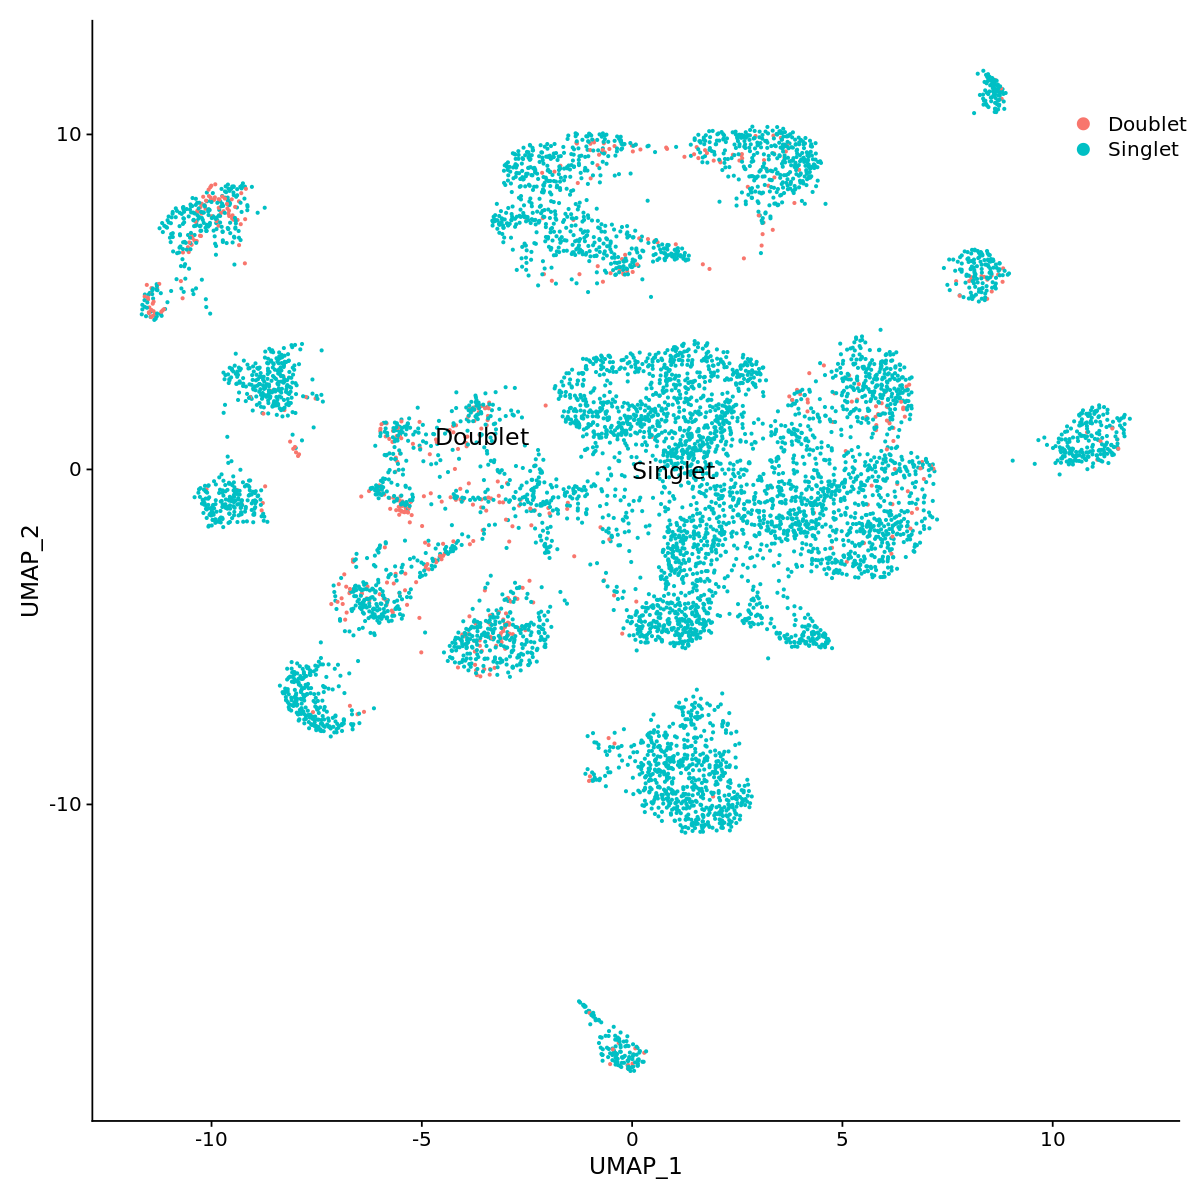

In [17]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(object = df0, 
        reduction = "umap", 
        group.by = c('DF.classifications_0.25_0.26_523'),
        label = T,
        pt.size = 0.5,
        label.size = 5) + 
        theme(legend.position = c(0.9, 0.9))

In [19]:
df0<-subset(df0, subset = DF.classifications_0.25_0.26_523 == "Singlet")

In [20]:
saveRDS(df0,"20-07-28_TSC_clustered.rds")

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(object = df0, 
        reduction = "umap", 
        group.by = c('se'),
        label = T,
        pt.size = 0.5,
        label.size = 5) + 
        theme(legend.position = c(0.9, 0.9))

# WGCNA

In [5]:
df0<-readRDS('2020-08-01_TSC_clustered.rds')

In [6]:
allowWGCNAThreads(nThreads = 12)

Allowing multi-threading with up to 12 threads.


In [7]:
plan(strategy = "multicore")
df0 <- NormalizeData(object = df0, 
                      normalization.method = "CLR", 
                      margin = 2, 
                     scale.factor = 10000)
plan(strategy = "sequential")

In [8]:
plan(strategy = "multicore")
df0 <- FindVariableFeatures(object = df0,
                            selection.method = "vst", 
                            nfeatures = 5000)
plan(strategy = "sequential")

In [9]:
hvg <- VariableFeatures(df0)

In [10]:
plan(strategy = "multicore")
df0 <- ScaleData(object = df0, 
                 features = hvg, 
                 vars.to.regress = c('nFeature_RNA','percent.mt','nCount_RNA'),
                 block.size = 20000,
                 verbose = F)
plan(strategy = "sequential")

In [11]:
length(hvg)

[1] 5000

In [12]:
rExpr <- t( as.matrix(df0@assays$RNA@scale.data[hvg,] ))

In [13]:
dim(rExpr)

[1] 6905 5000

In [14]:
powers = c(seq(from = 1, to=20, by=1))

In [15]:
sft <- pickSoftThreshold(rExpr, 
                         powerVector = powers, 
                         verbose = 0,
                         corFnc = "cor",
                         corOptions = list(method="p"),
                         networkType = "signed hybrid")

   Power SFT.R.sq slope truncated.R.sq  mean.k. median.k. max.k.
1      1    0.446 -1.87          0.892 4.20e+01  3.70e+01 150.00
2      2    0.959 -2.36          0.991 1.87e+00  1.08e+00  19.40
3      3    0.939 -1.98          0.993 1.74e-01  4.83e-02   4.67
4      4    0.929 -1.78          0.972 2.86e-02  3.08e-03   1.64
5      5    0.409 -2.55          0.352 7.11e-03  2.51e-04   1.00
6      6    0.495 -2.99          0.355 2.62e-03  2.37e-05   1.00
7      7    0.533 -2.60          0.496 1.42e-03  2.40e-06   1.00
8      8    0.539 -2.21          0.768 1.04e-03  2.51e-07   1.00
9      9    0.554 -2.03          0.764 9.05e-04  2.78e-08   1.00
10    10    0.565 -1.88          0.760 8.49e-04  3.21e-09   1.00
11    11    0.573 -1.77          0.758 8.25e-04  3.78e-10   1.00
12    12    0.580 -1.68          0.755 8.13e-04  4.43e-11   1.00
13    13    0.585 -1.60          0.754 8.07e-04  5.28e-12   1.00
14    14    0.589 -1.53          0.752 8.04e-04  6.37e-13   1.00
15    15    0.593 -1.47  

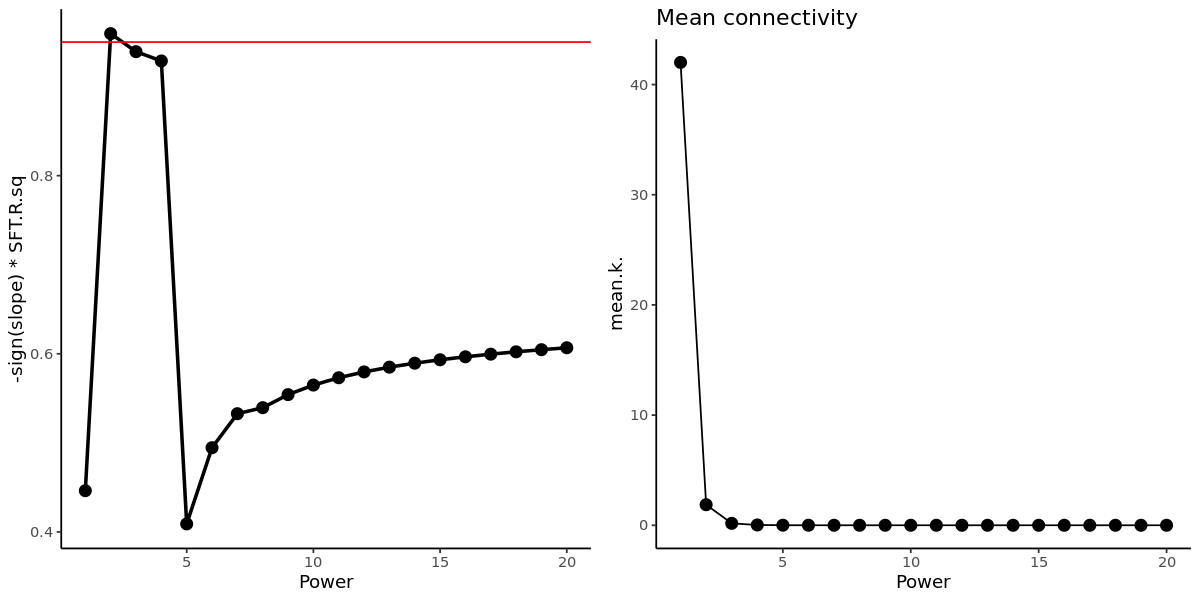

In [16]:
options(repr.plot.width = 10, repr.plot.height = 5)

g1 <- ggplot(data = sft$fitIndices, aes(x = Power, y = -sign(slope)*SFT.R.sq)) +
  geom_point(size = 3) +
  geom_line(size = 1) +
  geom_hline(aes(yintercept = 0.95), colour = "red") +
    theme_classic()

g2 <- ggplot(data = sft$fitIndices, aes(x = Power, y = mean.k.)) +
  geom_point(size = 3) +
  geom_line(size = 0.5) +
  ggtitle(label = "Mean connectivity") +
    theme_classic()

gridExtra::grid.arrange(g1, g2, ncol = 2)

In [17]:
softPower = 1

In [18]:
plan(strategy = "multicore")
cor <- cor(rExpr, method = "p")
plan(strategy = "sequential")

In [19]:
plan(strategy = "multicore")
cor  <- cosine(rExpr)
plan(strategy = "sequential")

In [20]:
write.csv(cor, "20-08-01_cosine_cor_WGCNA.csv")

In [ ]:
cor <- data.matrix(read.csv("20-08-01_cosine_cor_WGCNA.csv", header = T, row.names = 1), rownames.force = NA)

In [21]:
adj = adjacency.fromSimilarity(cor, type = "signed hybrid", power = softPower)

In [22]:
TOM = TOMsimilarity(adj, TOMDenom = "mean")

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [23]:
colnames(TOM) <- rownames(TOM) <- colnames(rExpr)
dissTOM <- 1 - TOM
geneTree <- hclust(as.dist(dissTOM), method="average");

In [24]:
# Set the minimum module size
minModuleSize = 30;
# Module identification using dynamic tree cut
dynamicMods = cutreeDynamic(dendro = geneTree,
                            cutHeight = 1,
                            method="hybrid",
                            deepSplit = 4,
#                             minAbsSplitHeight = 0.995,
                            minClusterSize = minModuleSize,
                            distM = dissTOM);

 ..done.


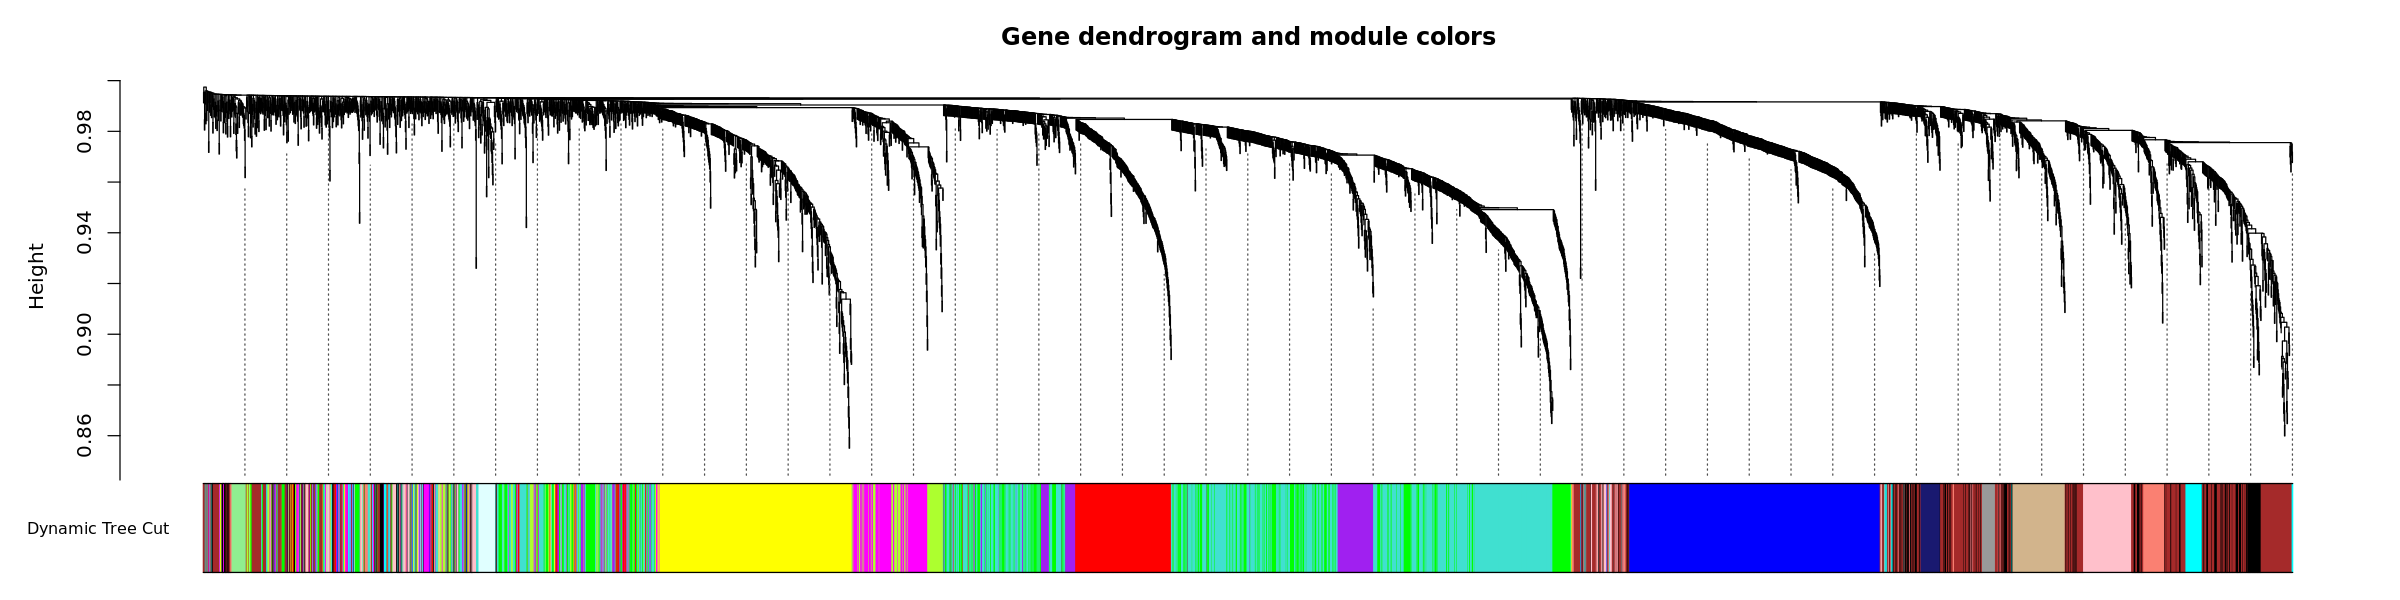

In [25]:
#Plot the module assignment under the dendrogram; note: The grey color is reserved for unassigned genes
dynamicColors = labels2colors(dynamicMods)
#table(dynamicColors)
options(repr.plot.width=20, repr.plot.height=5)
plotDendroAndColors(geneTree, 
                    dynamicColors, 
                    "Dynamic Tree Cut", 
                    dendroLabels = FALSE, 
                     hang = 0.03, 
                    addGuide = TRUE, 
                    guideHang = 0.05, 
                    main = "Gene dendrogram and module colors")

In [26]:
unique(dynamicColors)

[1] "magenta"      "yellow"       "turquoise"    "black"        "green"       
 [6] "purple"       "tan"          "greenyellow"  "pink"         "brown"       
[11] "salmon"       "red"          "blue"         "lightgreen"   "cyan"        
[16] "midnightblue" "grey60"       "lightcyan"

In [27]:
MEs <- moduleEigengenes(as.matrix(rExpr), dynamicColors)
MEs <- orderMEs(MEs$eigengenes)

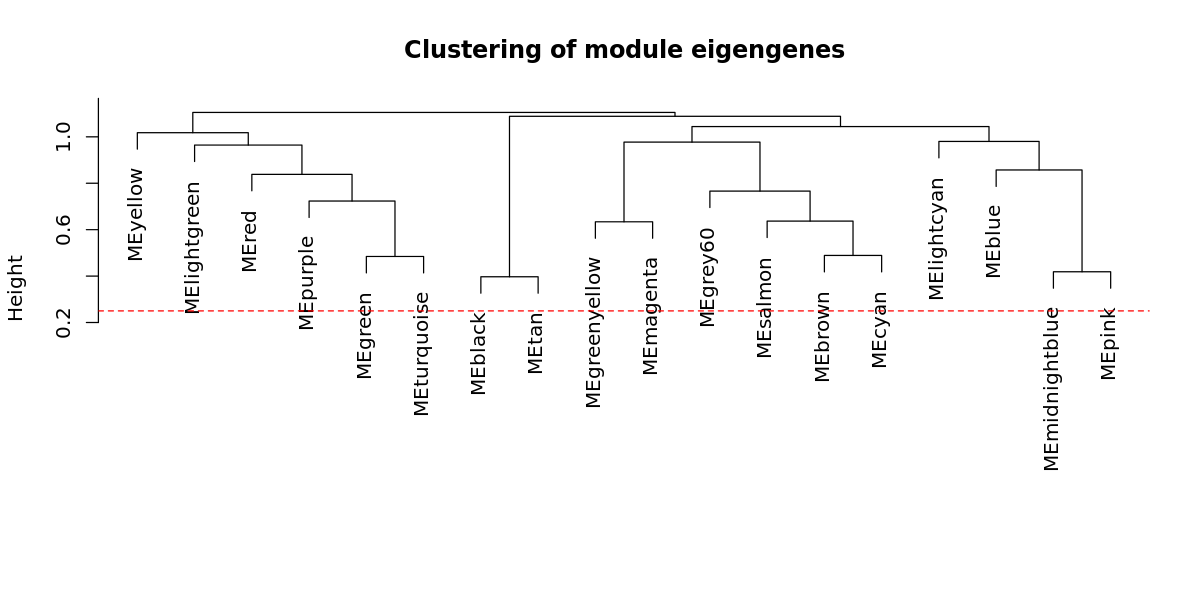

In [28]:
## Merge similar modules
options(repr.plot.width = 10, repr.plot.height = 5)
MEDiss = 1-cor(MEs)
METree = hclust(as.dist(MEDiss), method = "average")
plot(METree, main = "Clustering of module eigengenes", xlab = "", sub = "")
MEDissThres = 0.25
abline(h=MEDissThres, col = "red", lty = 2)

In [29]:
merge <- mergeCloseModules(rExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
MEs2 <- merge$newMEs
dynamicColors2 <- merge$colors

 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 18 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 18 module eigengenes in given set.


In [30]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(df0@meta.data$seurat_clusters) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(MEs, as.numeric(h), use = "p")
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(rExpr))
}

moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");

In [31]:
res <- reshape2::melt(moduleTraitPvalue)

In [32]:
res

Var1           Var2 value        
1   MEyellow       0     2.230427e-46
2   MElightgreen   0     6.842163e-02
3   MEred          0     1.902002e-07
4   MEpurple       0     1.987269e-16
5   MEgreen        0     3.262165e-02
6   MEturquoise    0     6.458462e-28
7   MEblack        0     2.187416e-04
8   MEtan          0     2.972291e-18
9   MEgreenyellow  0     3.879113e-11
10  MEmagenta      0     1.591729e-31
11  MEgrey60       0     1.981478e-01
12  MEsalmon       0     9.689789e-02
13  MEbrown        0     1.455082e-26
14  MEcyan         0     6.866237e-37
15  MElightcyan    0     2.298055e-14
16  MEblue         0     5.104452e-08
17  MEmidnightblue 0    2.689019e-247
18  MEpink         0     0.000000e+00
19  MEyellow       1     1.827335e-50
20  MElightgreen   1     4.137755e-01
21  MEred          1     4.546771e-11
22  MEpurple       1     7.093658e-14
23  MEgreen        1     8.660023e-11
24  MEturquoise    1     3.139794e-29
25  MEblack        1     1.572144e-37
26  MEtan          1     2.345482e-67
27  MEgreenyellow  1     9.652495e-27
28  MEmagenta      1     1.033035e-05
29  MEgrey60       1     0.000000e+00
30  MEsalmon       1     2.227559e-34
⋮   ⋮              ⋮    ⋮            
331 MEblack        8     1.079281e-01
332 MEtan          8     9.707968e-01
333 MEgreenyellow  8     2.494988e-04
334 MEmagenta      8     1.459249e-06
335 MEgrey60       8     1.550837e-04
336 MEsalmon       8     2.317520e-01
337 MEbrown        8     1.526694e-05
338 MEcyan         8     4.094496e-06
339 MElightcyan    8     1.510852e-05
340 MEblue         8     0.000000e+00
341 MEmidnightblue 8     3.402146e-17
342 MEpink         8     4.080766e-52
343 MEyellow       9     1.876619e-06
344 MElightgreen   9     1.289669e-53
345 MEred          9     0.000000e+00
346 MEpurple       9    1.755138e-115
347 MEgreen        9     6.666875e-01
348 MEturquoise    9     4.607547e-01
349 MEblack        9     3.179679e-03
350 MEtan          9     1.183815e-01
351 MEgreenyellow  9     6.820289e-01
352 MEmagenta      9     3.362645e-03
353 MEgrey60       9     2.274537e-03
354 MEsalmon       9     4.701901e-01
355 MEbrown        9     1.899822e-11
356 MEcyan         9     2.952215e-06
357 MElightcyan    9     1.478514e-05
358 MEblue         9     5.018460e-11
359 MEmidnightblue 9     1.665560e-05
360 MEpink         9     6.254273e-13

In [33]:
unique(res$Var2)

[1]  0  1 10 11 12 13 14 15 16 17 18 19  2  3  4  5  6  7  8  9

In [34]:
to.plot <- reshape2::melt(moduleTraitCor)

In [35]:
to.plot$p_value <- res$value

In [36]:
to.plot$value[to.plot$value <= 0] <- NA
# to.plot$p_value[to.plot$p_value > 0.05] <- NA

In [37]:
to.plot$Var2 <- factor(to.plot$Var2, 
                       levels = c('0','1',
                                    '2','3','4','5','6','7','8',
                                    '9','10','11','12',
                                    '13','14','15','16','17','18','19'))

In [38]:
unique(to.plot$Var1)

[1] MEyellow       MElightgreen   MEred          MEpurple       MEgreen       
 [6] MEturquoise    MEblack        MEtan          MEgreenyellow  MEmagenta     
[11] MEgrey60       MEsalmon       MEbrown        MEcyan         MElightcyan   
[16] MEblue         MEmidnightblue MEpink        
18 Levels: MEyellow MElightgreen MEred MEpurple MEgreen MEturquoise ... MEpink

In [39]:
cell_type_modules = c("MEyellow","MElightgreen","MEred","MEpurple","MEgreen","MEturquoise","MEblack","MEtan","MEgreenyellow","MEmagenta","MEgrey60","MEsalmon","MEbrown","MEcyan","MElightcyan","MEblue","MEmidnightblue","MEpink")

Warning message:
“Removed 245 rows containing missing values (geom_point).”


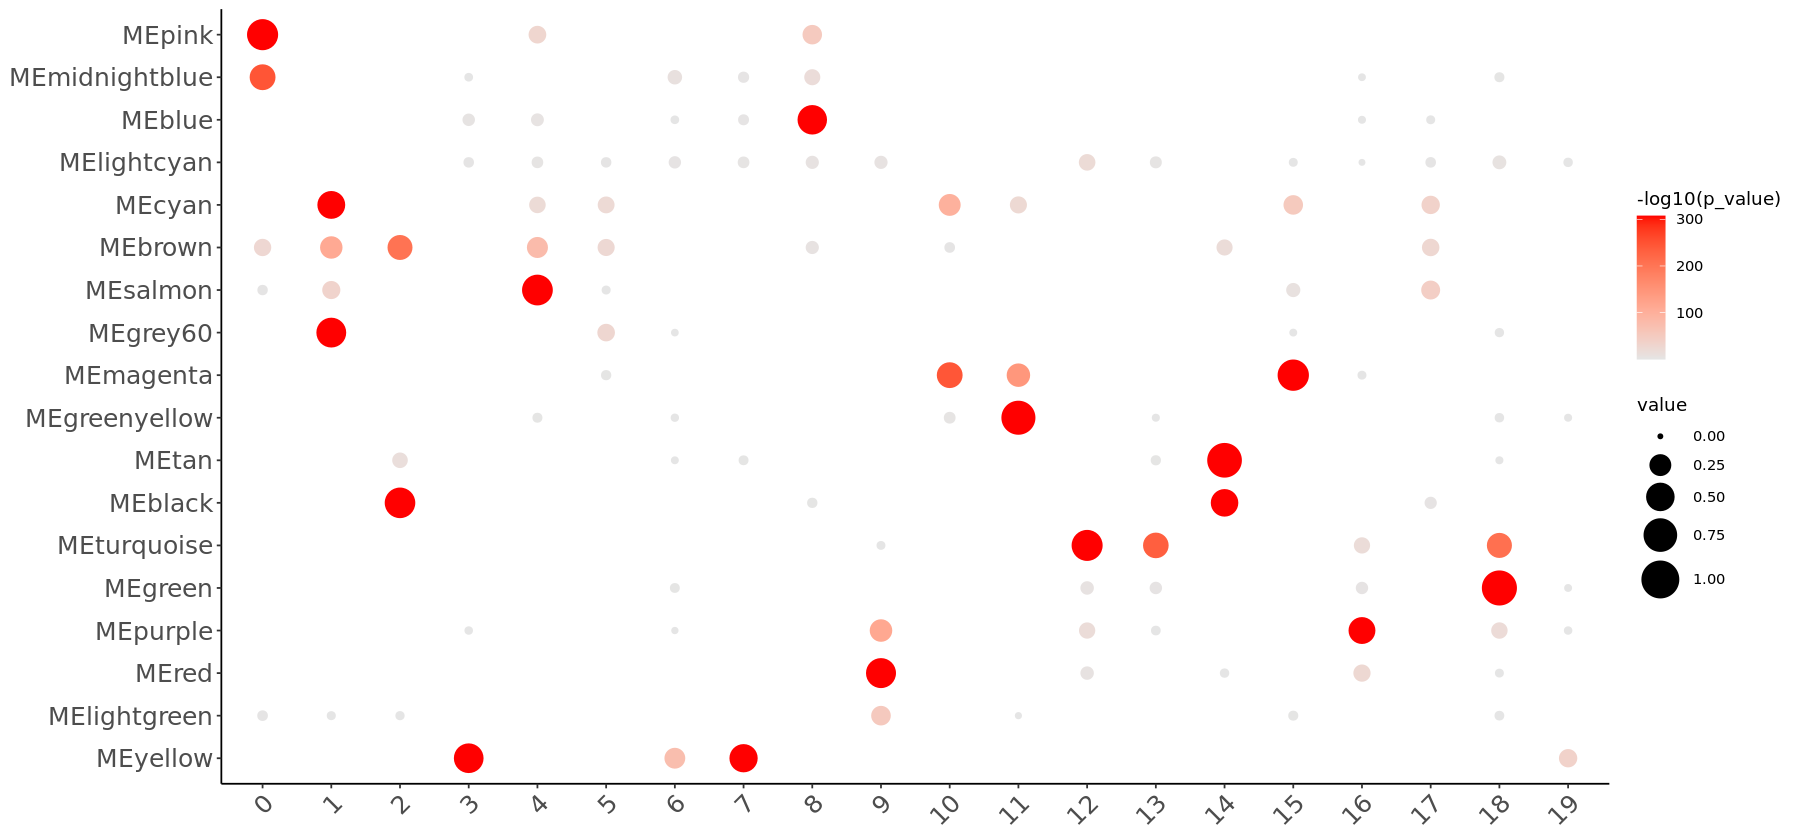

In [40]:
options(repr.plot.width = 15, repr.plot.height = 7)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

#purple: oligo


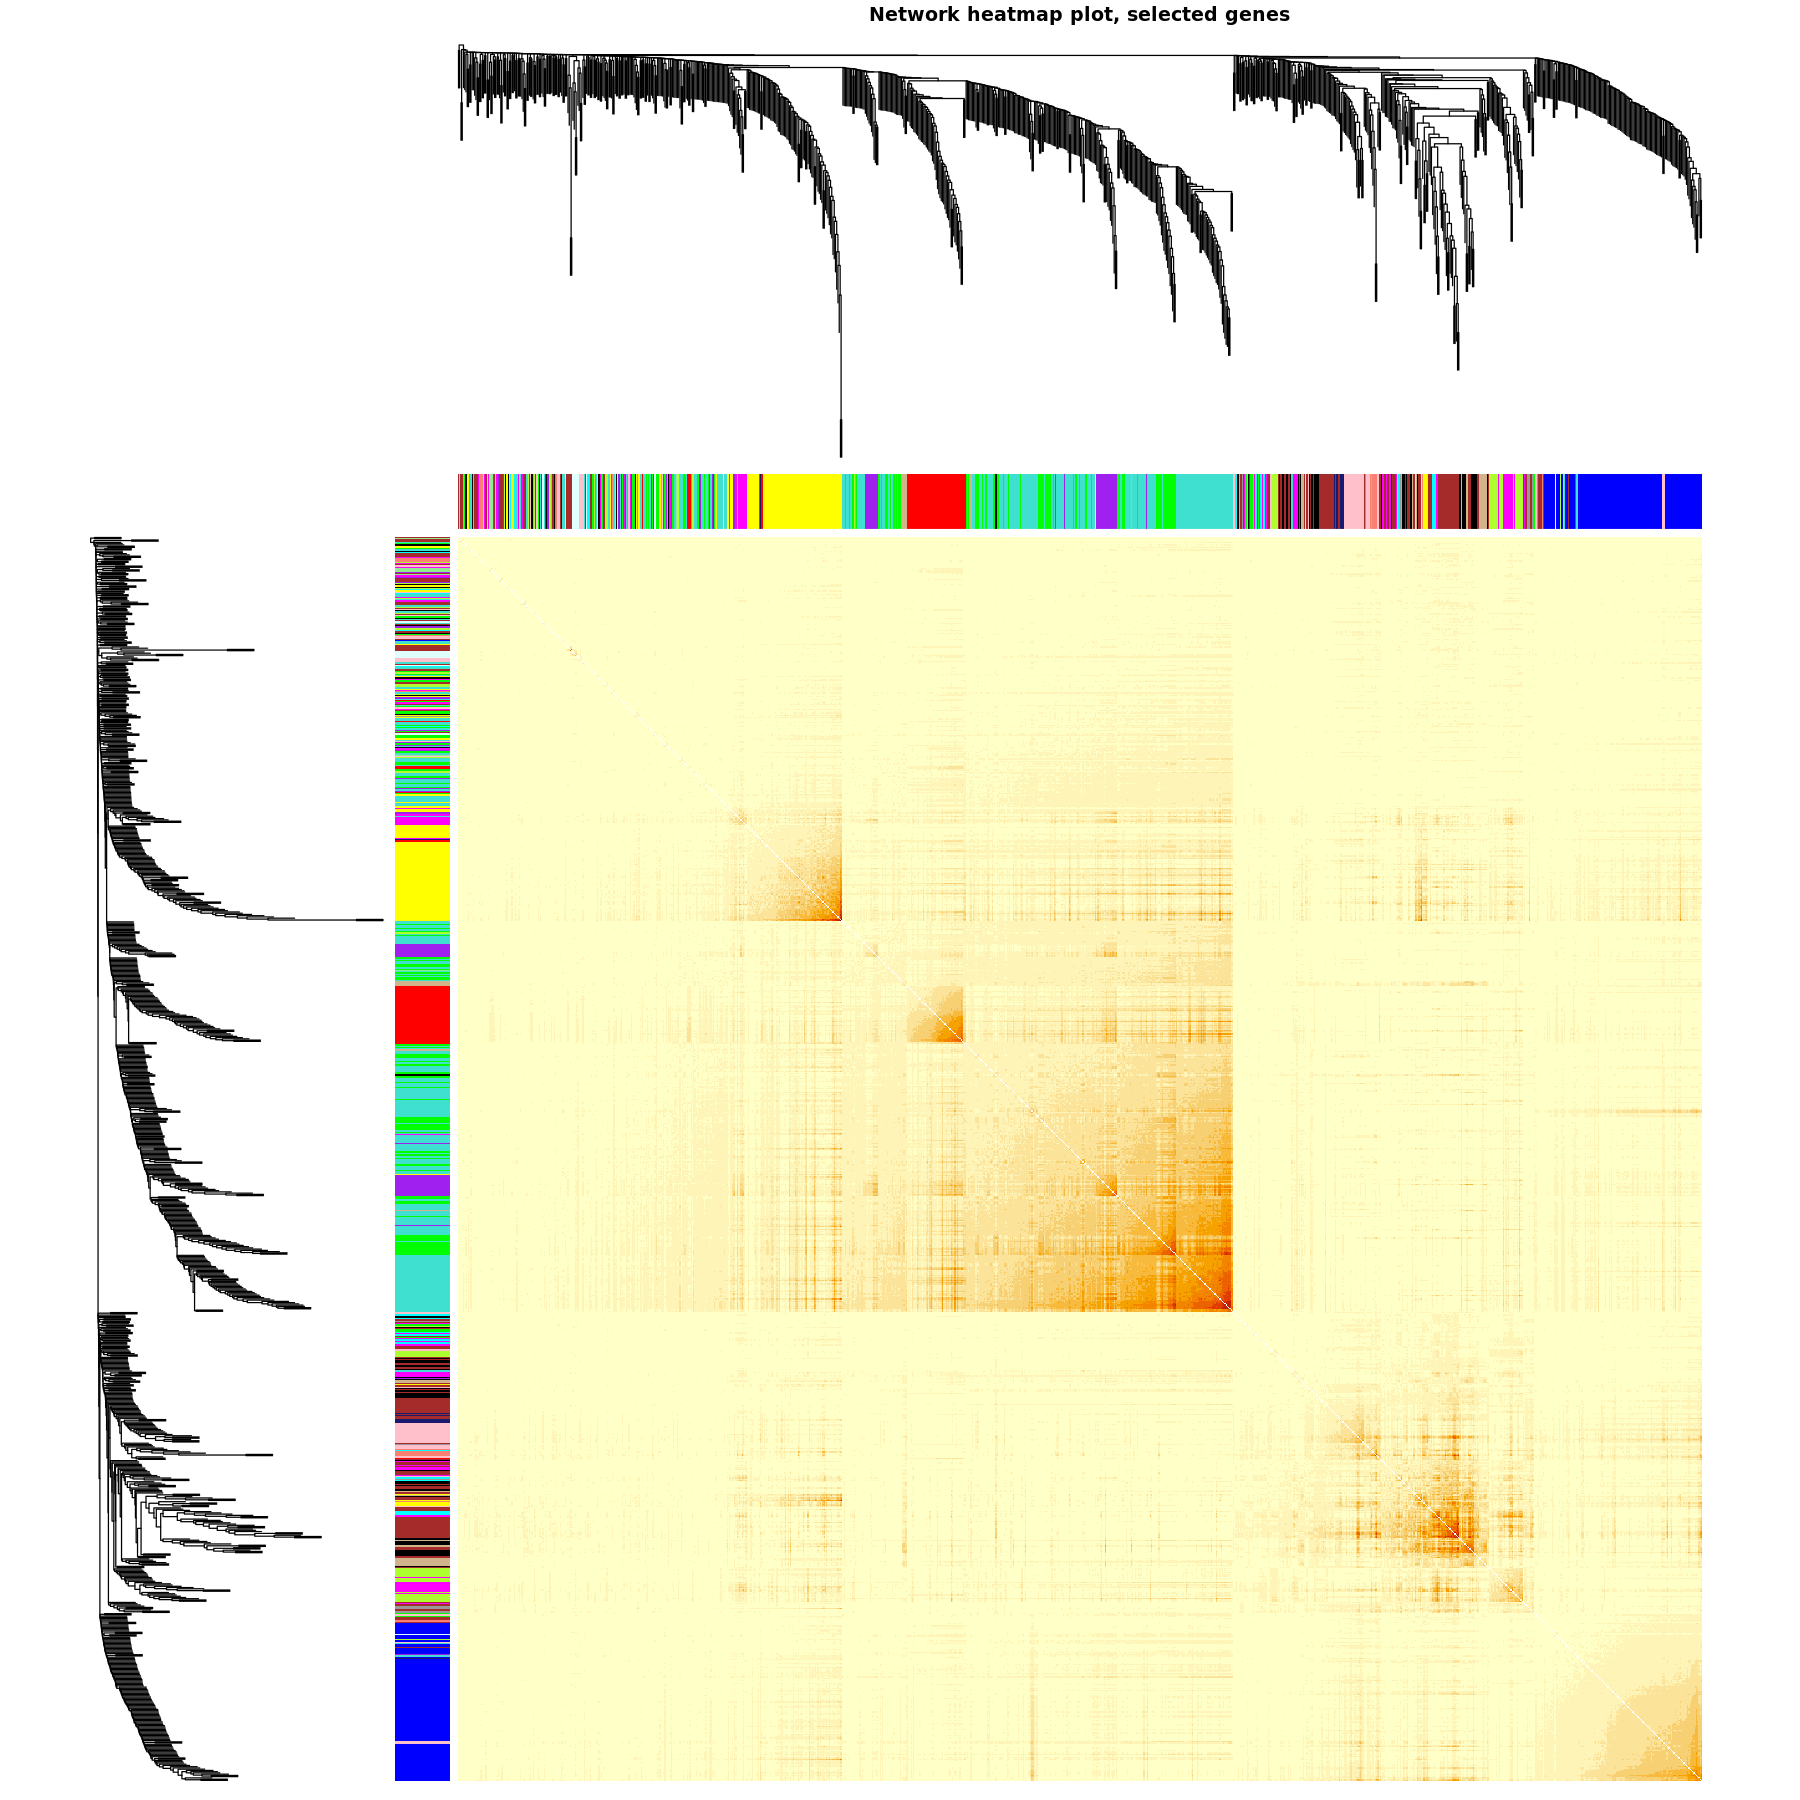

In [41]:
options(repr.plot.width = 15, repr.plot.height = 15)
nSelect = 1000
nGenes <- ncol(rExpr)
nSamples <- nrow(rExpr)

# For reproducibility, we set the random seed
set.seed(10);
select <- sample(nGenes, size = nSelect);
selectTOM <-dissTOM[select, select];
# There’s no simple way of restricting a clustering tree to a subset of genes, so we must re-cluster.
selectTree <- hclust(as.dist(selectTOM), method = "average")
selectColors <- dynamicColors2[select];
# Open a graphical window
# Taking the dissimilarity to a power, say 10, makes the plot more informative by effectively changing
# the color palette; setting the diagonal to NA also improves the clarity of the plot
plotDiss <- 1-selectTOM^7;
diag(plotDiss) <- NA;
TOMplot(plotDiss, selectTree, selectColors, main = "Network heatmap plot, selected genes")


In [42]:
Genelist <- as.data.frame(dynamicColors2, col.names = "Gene", row.names =row.names(TOM))

In [43]:
Genelist

dynamicColors2
HTR2C         magenta       
TTN           yellow        
GPC5          turquoise     
ADGRV1        turquoise     
CNTN5         yellow        
ADAMTSL1      magenta       
ZNF804B       black         
GRIK1         yellow        
DCT           green         
ADARB2        yellow        
TNC           turquoise     
BCAS1         purple        
POSTN         tan           
SCN7A         turquoise     
NDST4         yellow        
ARHGAP24      green         
CXCL14        yellow        
FN1           green         
HPSE2         yellow        
ERBB4         yellow        
RELN          yellow        
ATP6V0D2      green         
HJV           green         
NPFFR2        greenyellow   
NPSR1         magenta       
MDFIC         greenyellow   
GLIS3         turquoise     
COLEC12       turquoise     
TRPM1         green         
RERGL         pink          
⋮             ⋮             
TRIM39-RPP21  brown         
MUCL3         pink          
MCCD1         green         
LY6G6F-LY6G6D brown         
MPIG6B        brown         
LY6G6C        purple        
C4B           brown         
HLA-DQB2      brown         
KCNK16        brown         
APOBEC2       yellow        
TREM1         brown         
NCR2          yellow        
CRISP3        purple        
GSTA5         cyan          
DPPA5         brown         
CGA           turquoise     
SOGA3         brown         
VNN3          brown         
SLC35D3       green         
RAET1G        salmon        
FERD3L        turquoise     
HOXA3         pink          
EVX1          turquoise     
INMT-MINDY4   turquoise     
AC096582.3    brown         
ZNF735        brown         
TFPI2         greenyellow   
OR2AE1        greenyellow   
SPDYE6        brown         
OR2A14        lightcyan

In [46]:
lapply(unique(dynamicColors2), function(xx){
a <- subset(Genelist, Genelist$dynamicColors2==xx)
write.csv(a, paste("20-08-01_ME", xx, "_geneset.csv"))
})

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL